<a href="https://colab.research.google.com/github/JVS08/Jatinder-inse6220-project/blob/main/Jatinder_inse6220_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1.5.3


In [25]:
df = pd.read_csv('/content/hci_Female_september_2020.csv')
df.head(n=10)

Country Name WB Code   POS   EYS  HTS   ASR  HCI (LB)   HCI  \
0          Afghanistan     AFG  0.94   6.9  350  0.81      0.36  0.37   
1              Albania     ALB  0.99  13.3  444  0.95      0.65  0.66   
2              Algeria     DZA  0.98  12.2  383  0.92      0.55  0.56   
3               Angola     AGO  0.93   7.0  325  0.78      0.33  0.36   
4  Antigua and Barbuda     ATG  0.99  13.3  417  0.92      0.61  0.63   
5            Argentina     ARG  0.99  13.1  406  0.92      0.60  0.61   
6              Armenia     ARM  0.99  11.5  448  0.94      0.59  0.60   
7            Australia     AUS  1.00  13.6  520  0.96      0.77  0.78   
8              Austria     AUT  1.00  13.5  510  0.96      0.75  0.76   
9           Azerbaijan     AZE  0.98  12.4  420  0.91      0.57  0.59   

   HCI(UB)  CLASS  
0     0.38      1  
1     0.68      3  
2     0.57      2  
3     0.38      2  
4     0.64      4  
5     0.62      3  
6     0.61      3  
7     0.79      4  
8     0.77      4  
9     0.60      3

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  174 non-null    object 
 1   WB Code       174 non-null    object 
 2   POS           174 non-null    float64
 3   EYS           174 non-null    float64
 4   HTS           174 non-null    int64  
 5   ASR           174 non-null    float64
 6   HCI (LB)      174 non-null    float64
 7   HCI           174 non-null    float64
 8   HCI(UB)       174 non-null    float64
 9   CLASS         174 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 13.7+ KB


In [27]:
y = df['CLASS']
c=y.copy()
print(c)
target = df['CLASS'].to_numpy()

0      1
1      3
2      2
3      2
4      4
      ..
169    1
170    2
171    2
172    2
173    2
Name: CLASS, Length: 174, dtype: int64


In [28]:
df.drop(['WB Code','Country Name',],axis=1,inplace=True)

In [29]:
X = df.iloc[:,0:7]
X.head(10)

POS   EYS  HTS   ASR  HCI (LB)   HCI  HCI(UB)
0  0.94   6.9  350  0.81      0.36  0.37     0.38
1  0.99  13.3  444  0.95      0.65  0.66     0.68
2  0.98  12.2  383  0.92      0.55  0.56     0.57
3  0.93   7.0  325  0.78      0.33  0.36     0.38
4  0.99  13.3  417  0.92      0.61  0.63     0.64
5  0.99  13.1  406  0.92      0.60  0.61     0.62
6  0.99  11.5  448  0.94      0.59  0.60     0.61
7  1.00  13.6  520  0.96      0.77  0.78     0.79
8  1.00  13.5  510  0.96      0.75  0.76     0.77
9  0.98  12.4  420  0.91      0.57  0.59     0.60

In [30]:
X.describe().transpose()

count        mean        std     min     25%      50%     75%  \
POS       174.0    0.975115   0.026287    0.89    0.96    0.990    0.99   
EYS       174.0   11.350575   2.428414    3.80    9.80   12.200   13.20   
HTS       174.0  428.333333  64.897102  302.00  383.00  421.000  482.75   
ASR       174.0    0.880000   0.081055    0.59    0.83    0.910    0.94   
HCI (LB)  174.0    0.568736   0.147443    0.27    0.45    0.580    0.68   
HCI       174.0    0.585172   0.142150    0.29    0.47    0.595    0.69   
HCI(UB)   174.0    0.604943   0.141902    0.31    0.48    0.610    0.72   

             max  
POS         1.00  
EYS        14.00  
HTS       578.00  
ASR         0.98  
HCI (LB)    0.90  
HCI         0.89  
HCI(UB)     0.90

In [31]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()

count          mean       std       min       25%       50%  \
POS       174.0 -5.334813e-15  1.002886 -3.247206 -0.576648  0.567877   
EYS       174.0 -3.922469e-16  1.002886 -3.118235 -0.640356  0.350795   
HTS       174.0  2.756416e-16  1.002886 -1.952290 -0.700558 -0.113326   
ASR       174.0 -5.870145e-17  1.002886 -3.588135 -0.618644  0.371186   
HCI (LB)  174.0 -3.624176e-16  1.002886 -2.031957 -0.807623  0.076619   
HCI       174.0  6.227458e-16  1.002886 -2.082479 -0.812556  0.069335   
HCI(UB)   174.0 -5.066190e-16  1.002886 -2.084496 -0.883027  0.035743   

               75%       max  
POS       0.567877  0.949386  
EYS       0.763775  1.094159  
HTS       0.840927  2.312871  
ASR       0.742373  1.237288  
HCI (LB)  0.756804  2.253213  
HCI       0.739572  2.150597  
HCI(UB)   0.813165  2.085308

In [32]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]
['POS', 'EYS', 'HTS', 'ASR', 'HCI (LB)', 'HCI', 'HCI(UB)']


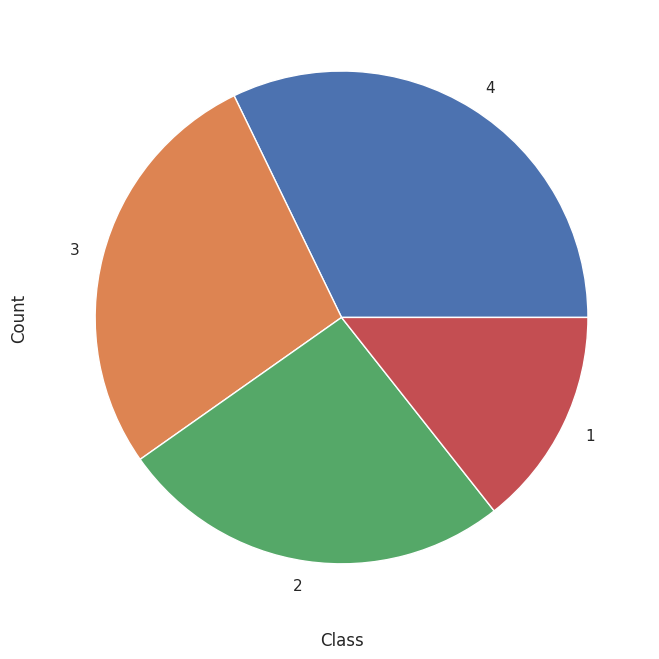

In [33]:
y.value_counts().plot(kind='pie', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

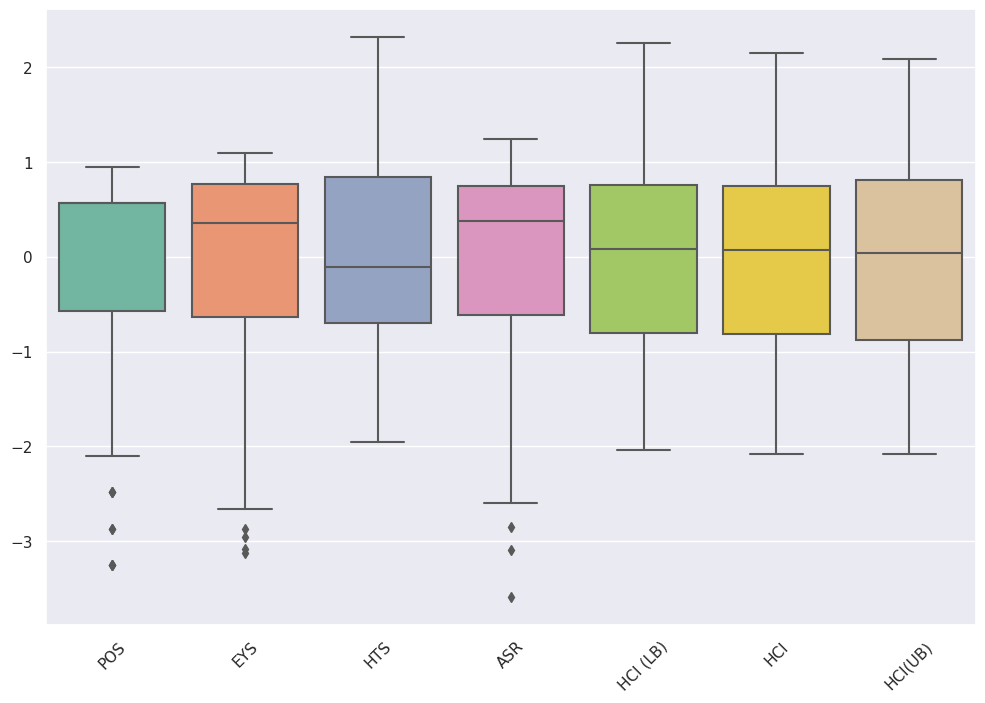

In [34]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


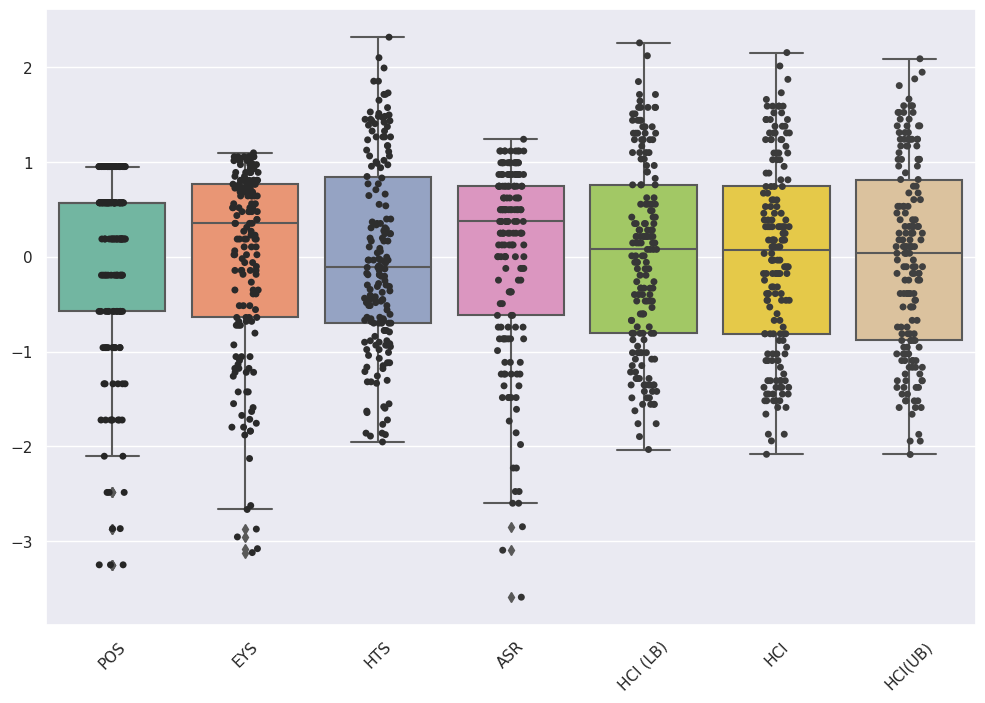

In [35]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [36]:
df.describe()

POS           EYS           HTS           ASR      HCI (LB)  \
count  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02   
mean  -5.334813e-15 -3.922469e-16  2.756416e-16 -5.870145e-17 -3.624176e-16   
std    1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00   
min   -3.247206e+00 -3.118235e+00 -1.952290e+00 -3.588135e+00 -2.031957e+00   
25%   -5.766476e-01 -6.403560e-01 -7.005577e-01 -6.186440e-01 -8.076227e-01   
50%    5.678773e-01  3.507955e-01 -1.133255e-01  3.711864e-01  7.661861e-02   
75%    5.678773e-01  7.637752e-01  8.409268e-01  7.423728e-01  7.568043e-01   
max    9.493856e-01  1.094159e+00  2.312871e+00  1.237288e+00  2.253213e+00   

                HCI       HCI(UB)  
count  1.740000e+02  1.740000e+02  
mean   6.227458e-16 -5.066190e-16  
std    1.002886e+00  1.002886e+00  
min   -2.082479e+00 -2.084496e+00  
25%   -8.125559e-01 -8.830269e-01  
50%    6.933486e-02  3.574350e-02  
75%    7.395718e-01  8.131646e-01  
max    2.150597e+00  2.085308e+00

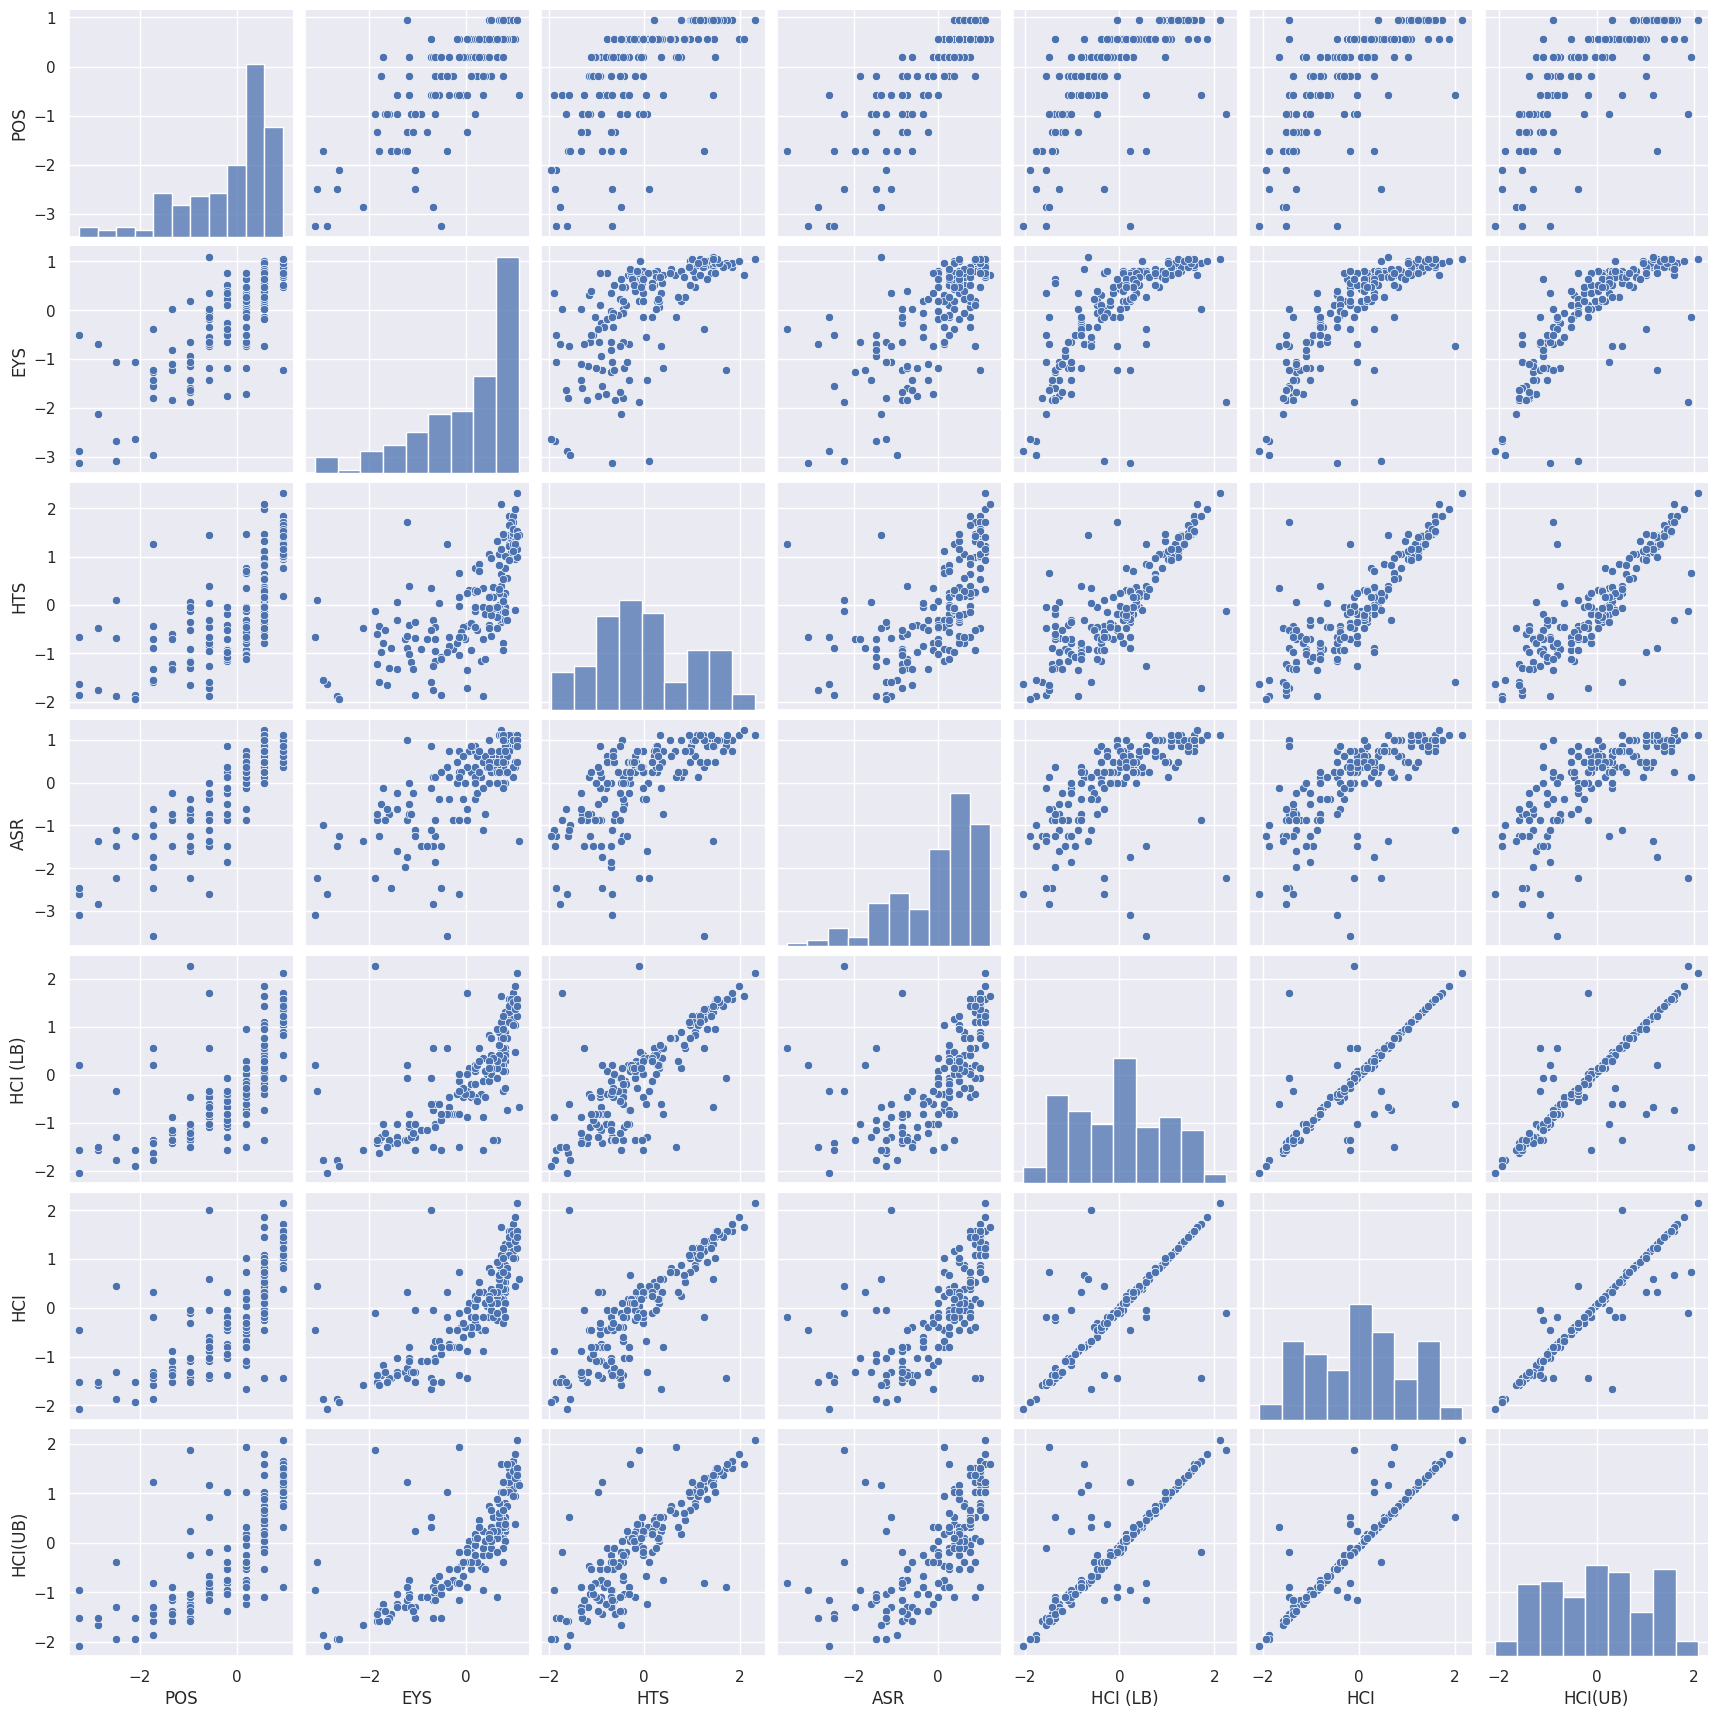

In [37]:
sns.pairplot(df)

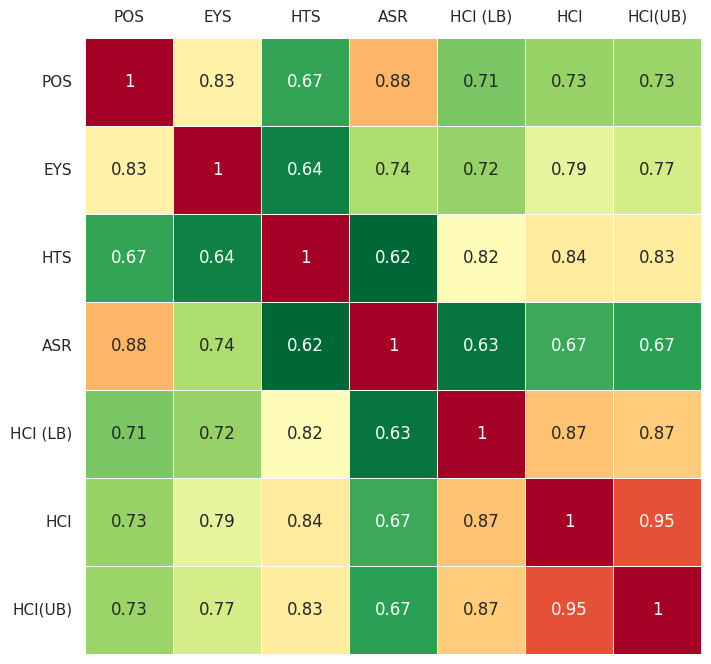

In [38]:
dfc = df - df.mean() 
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '$Z_2$')

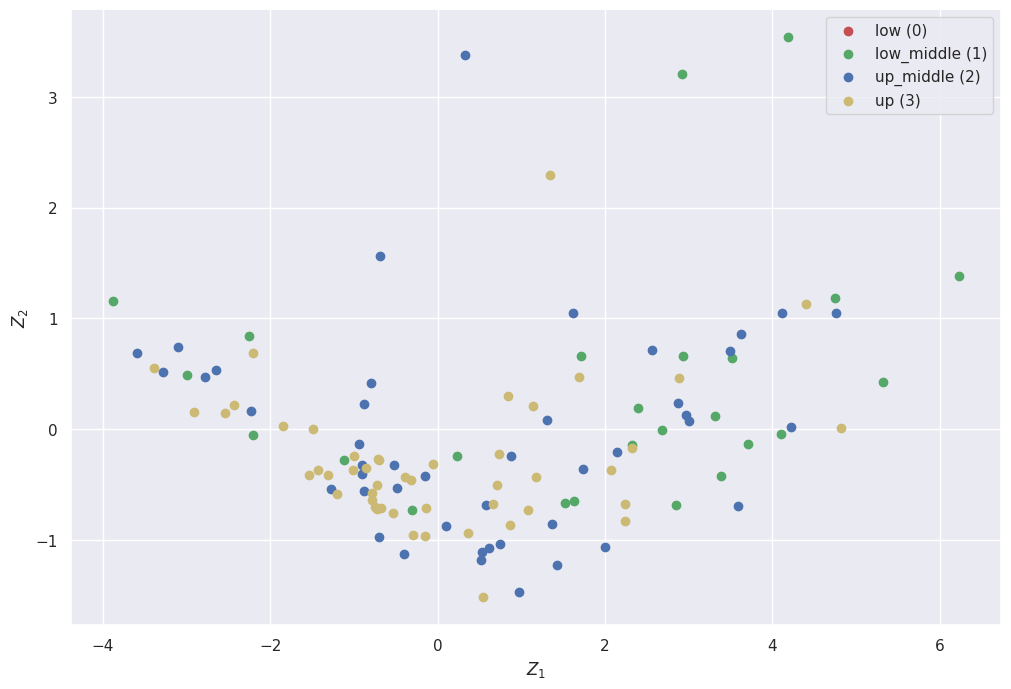

In [39]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
low = np.where(y == 0)
low_middle = np.where(y == 1)
up_middle = np.where(y == 2)
up = np.where(y==3)

plt. figure()
plt.scatter(Z[low,0], Z[low,1], c='r', label='low (0)')
plt.scatter(Z[low_middle,0], Z[low_middle,1], c='g', label='low_middle (1)')
plt.scatter(Z[up_middle,0], Z[up_middle,1], c='b', label='up_middle (2)')
plt.scatter(Z[up,0], Z[up,1], c='y', label='up (3)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvector matrix:
[[-0.37506837 -0.4725117   0.11226229  0.05955717 -0.25476464  0.72847161
   0.15598276]
 [-0.37245494 -0.26970348 -0.6867306  -0.33182098 -0.30738921 -0.31966817
  -0.10078396]
 [-0.36815667  0.36856146  0.5396244  -0.52443038 -0.38398672 -0.11958624
  -0.02558781]
 [-0.35174787 -0.56252046  0.42069858  0.132907    0.36127828 -0.47547678
  -0.09269541]
 [-0.38233213  0.31127163 -0.032392    0.76623735 -0.36999492 -0.17109463
  -0.05092723]
 [-0.39810086  0.27263943 -0.16685116 -0.05658431  0.43783597 -0.00265856
   0.73785835]
 [-0.39581939  0.28373159 -0.13685001 -0.05774795  0.48377938  0.3122209
  -0.63971577]]


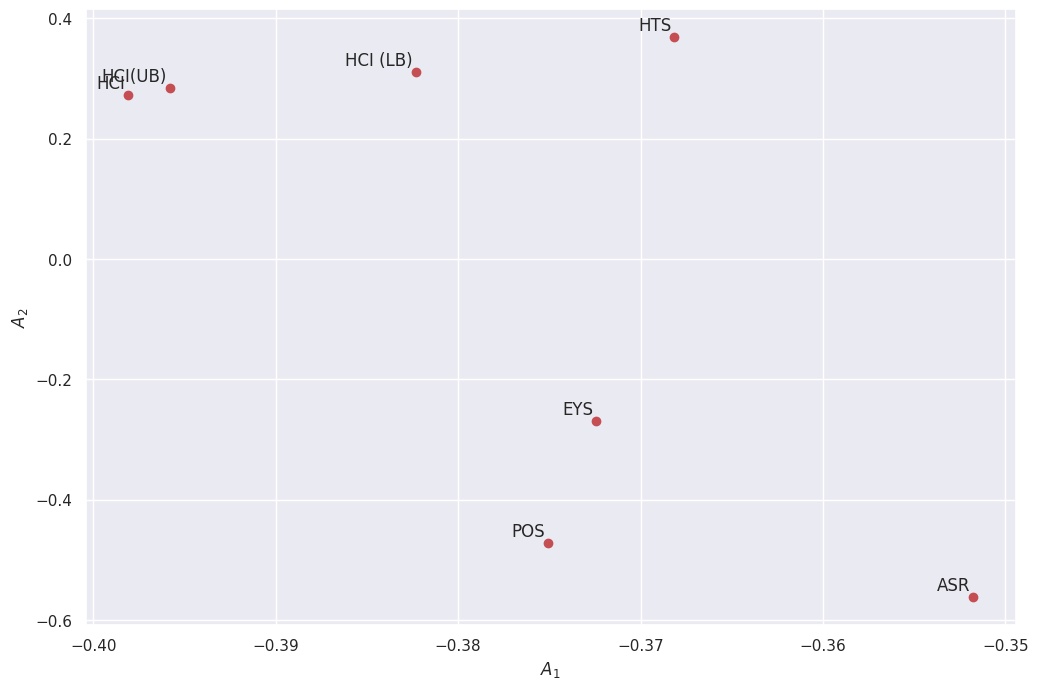

In [40]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


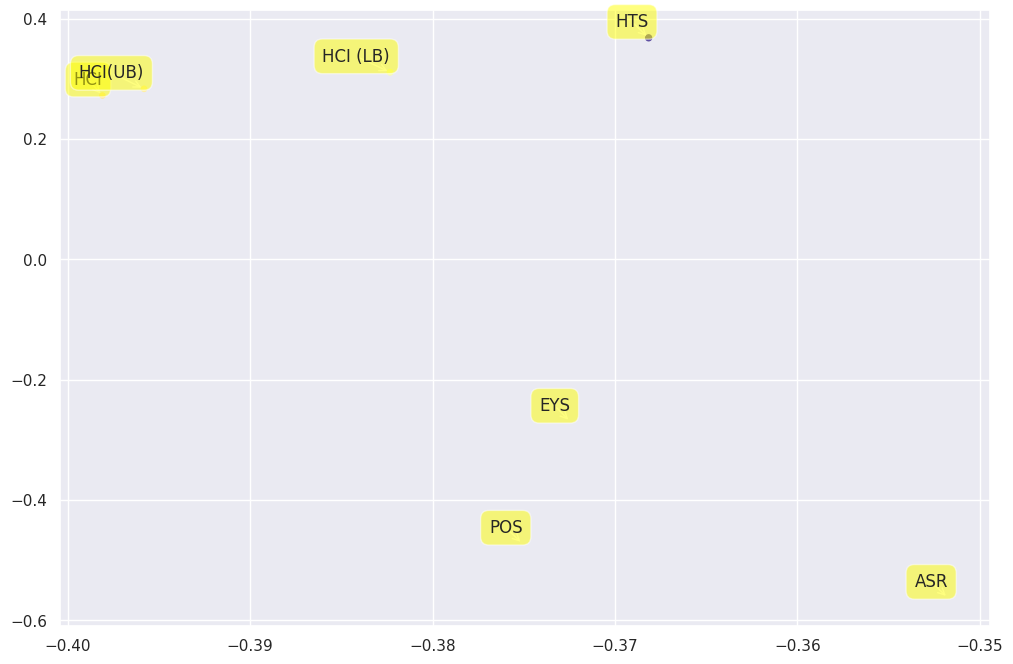

In [41]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[5.57377454 0.6878724  0.29293502 0.16857465 0.16124222 0.09786053
 0.05820307]


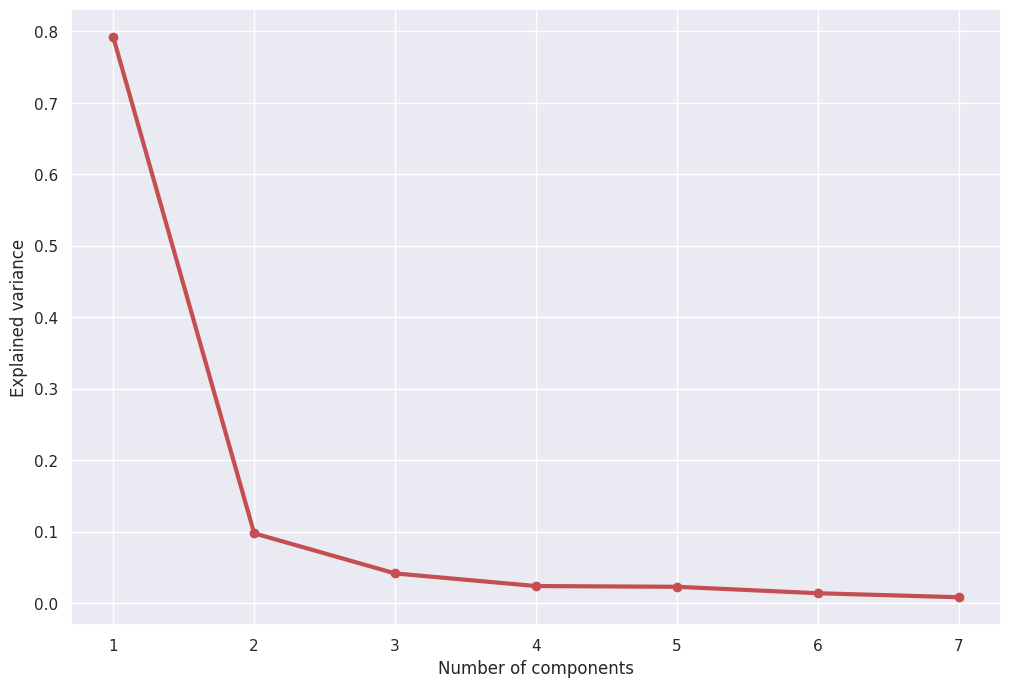

In [42]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

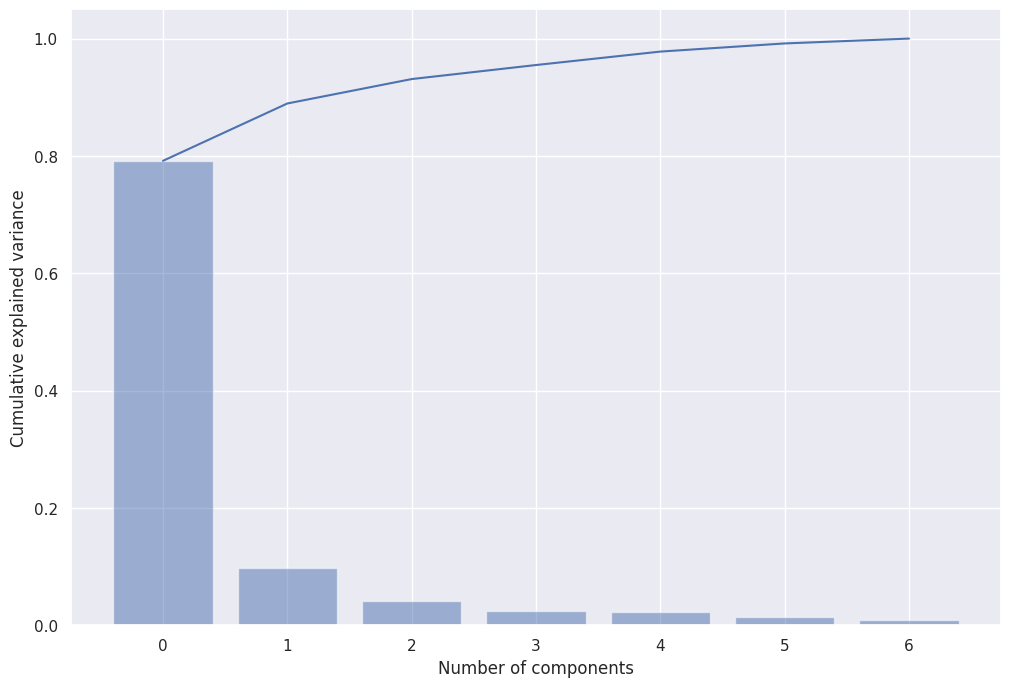

In [43]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [44]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (79.2%)',
 '1': 'PC 2 (9.8%)',
 '2': 'PC 3 (4.2%)',
 '3': 'PC 4 (2.4%)',
 '4': 'PC 5 (2.3%)',
 '5': 'PC 6 (1.4%)',
 '6': 'PC 7 (0.8%)'}

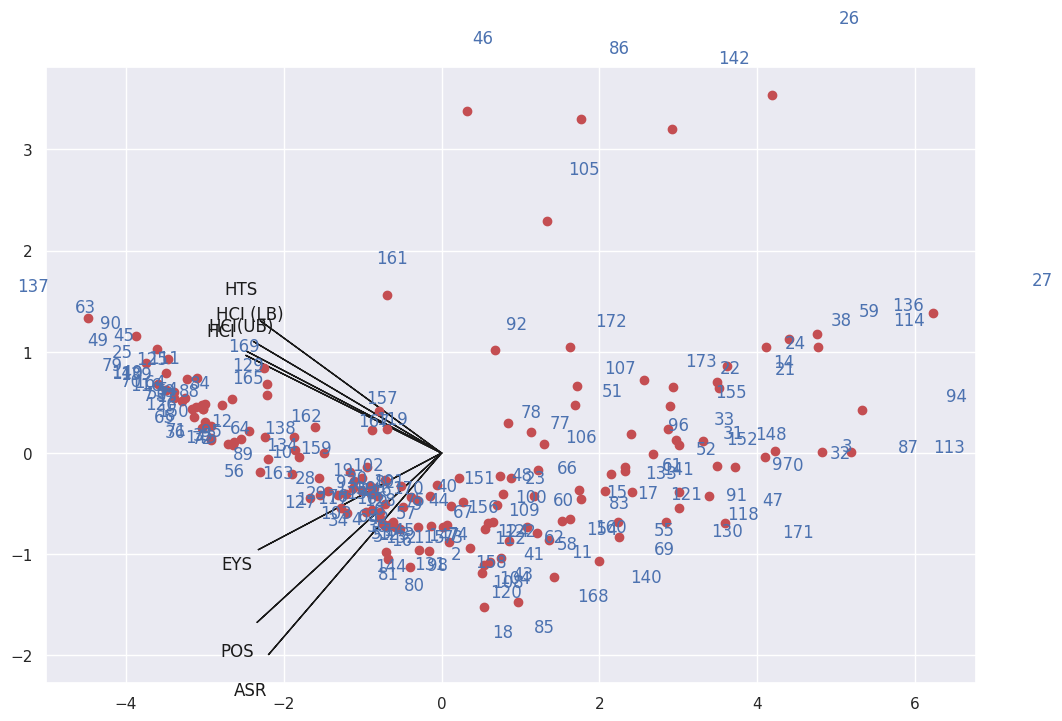

In [45]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b') 

In [46]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [48]:
print(out['topfeat'])

    PC   feature   loading  type
0  PC1       HCI -0.398101  best
1  PC2       ASR -0.562520  best
2  PC3       EYS -0.686731  best
3  PC4  HCI (LB)  0.766237  best
4  PC2       POS -0.472512  weak
5  PC3       HTS  0.539624  weak
6  PC1   HCI(UB) -0.395819  weak


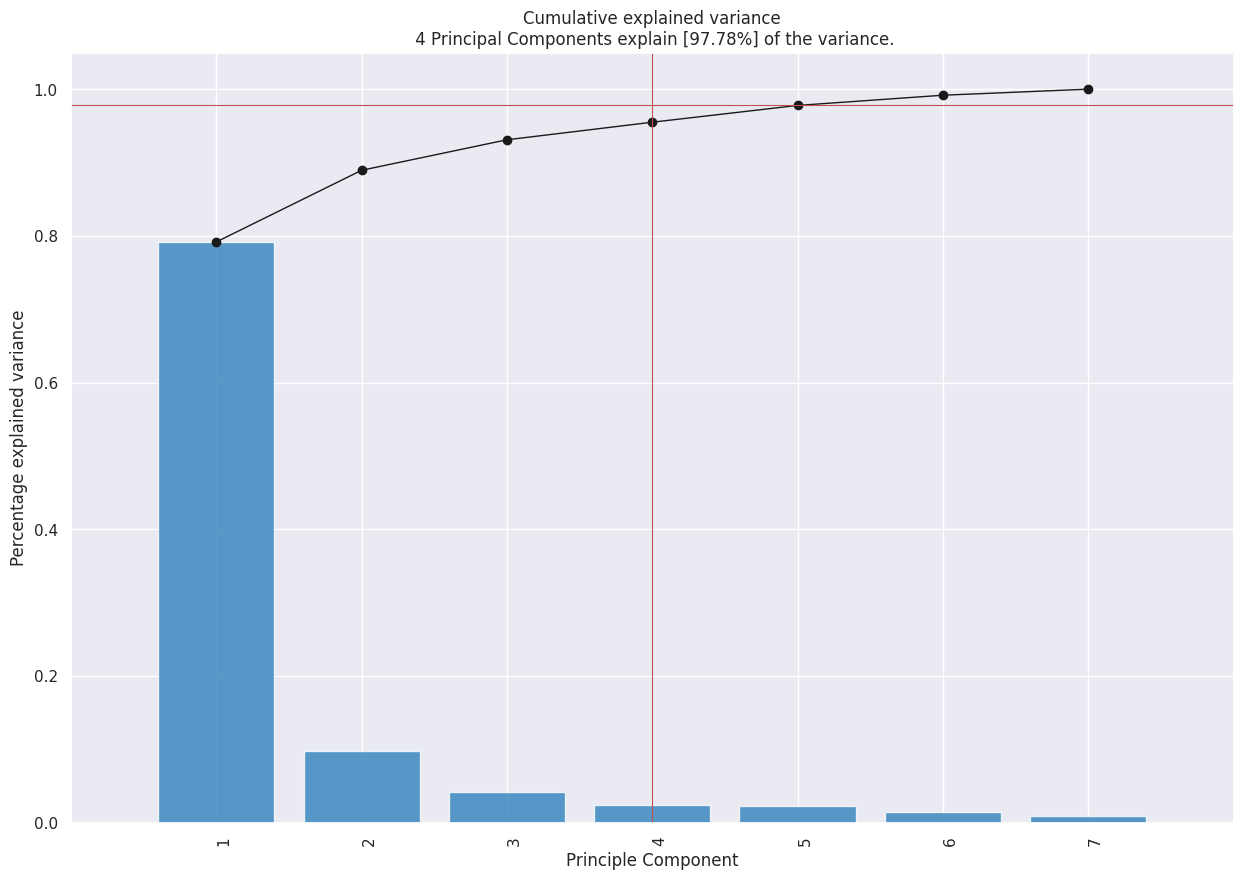

<Figure size 1200x800 with 0 Axes>

In [49]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


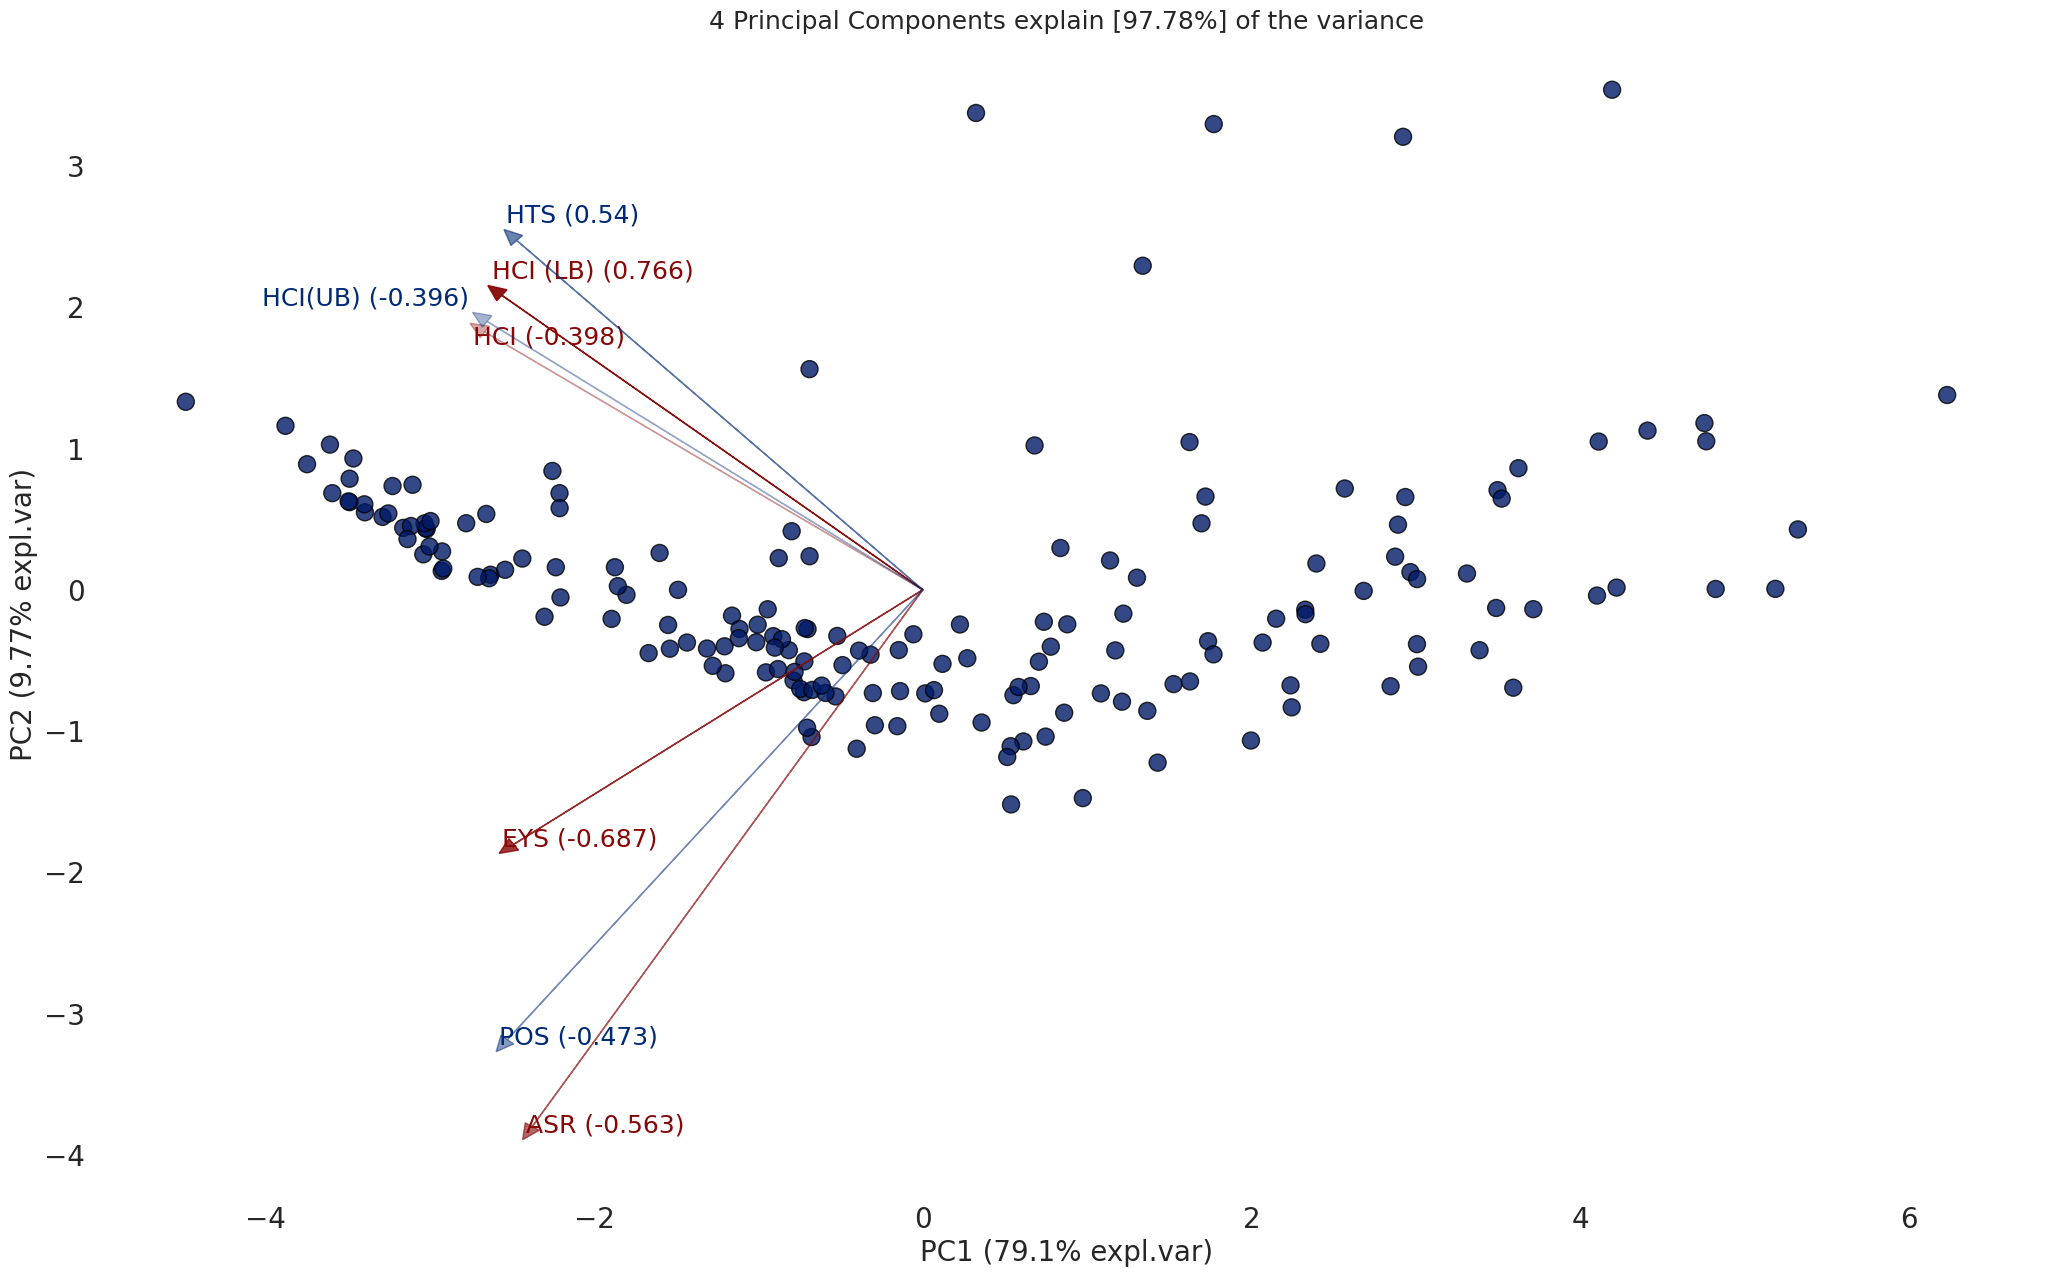

In [50]:
ax = model.biplot(label=False, legend=False)

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


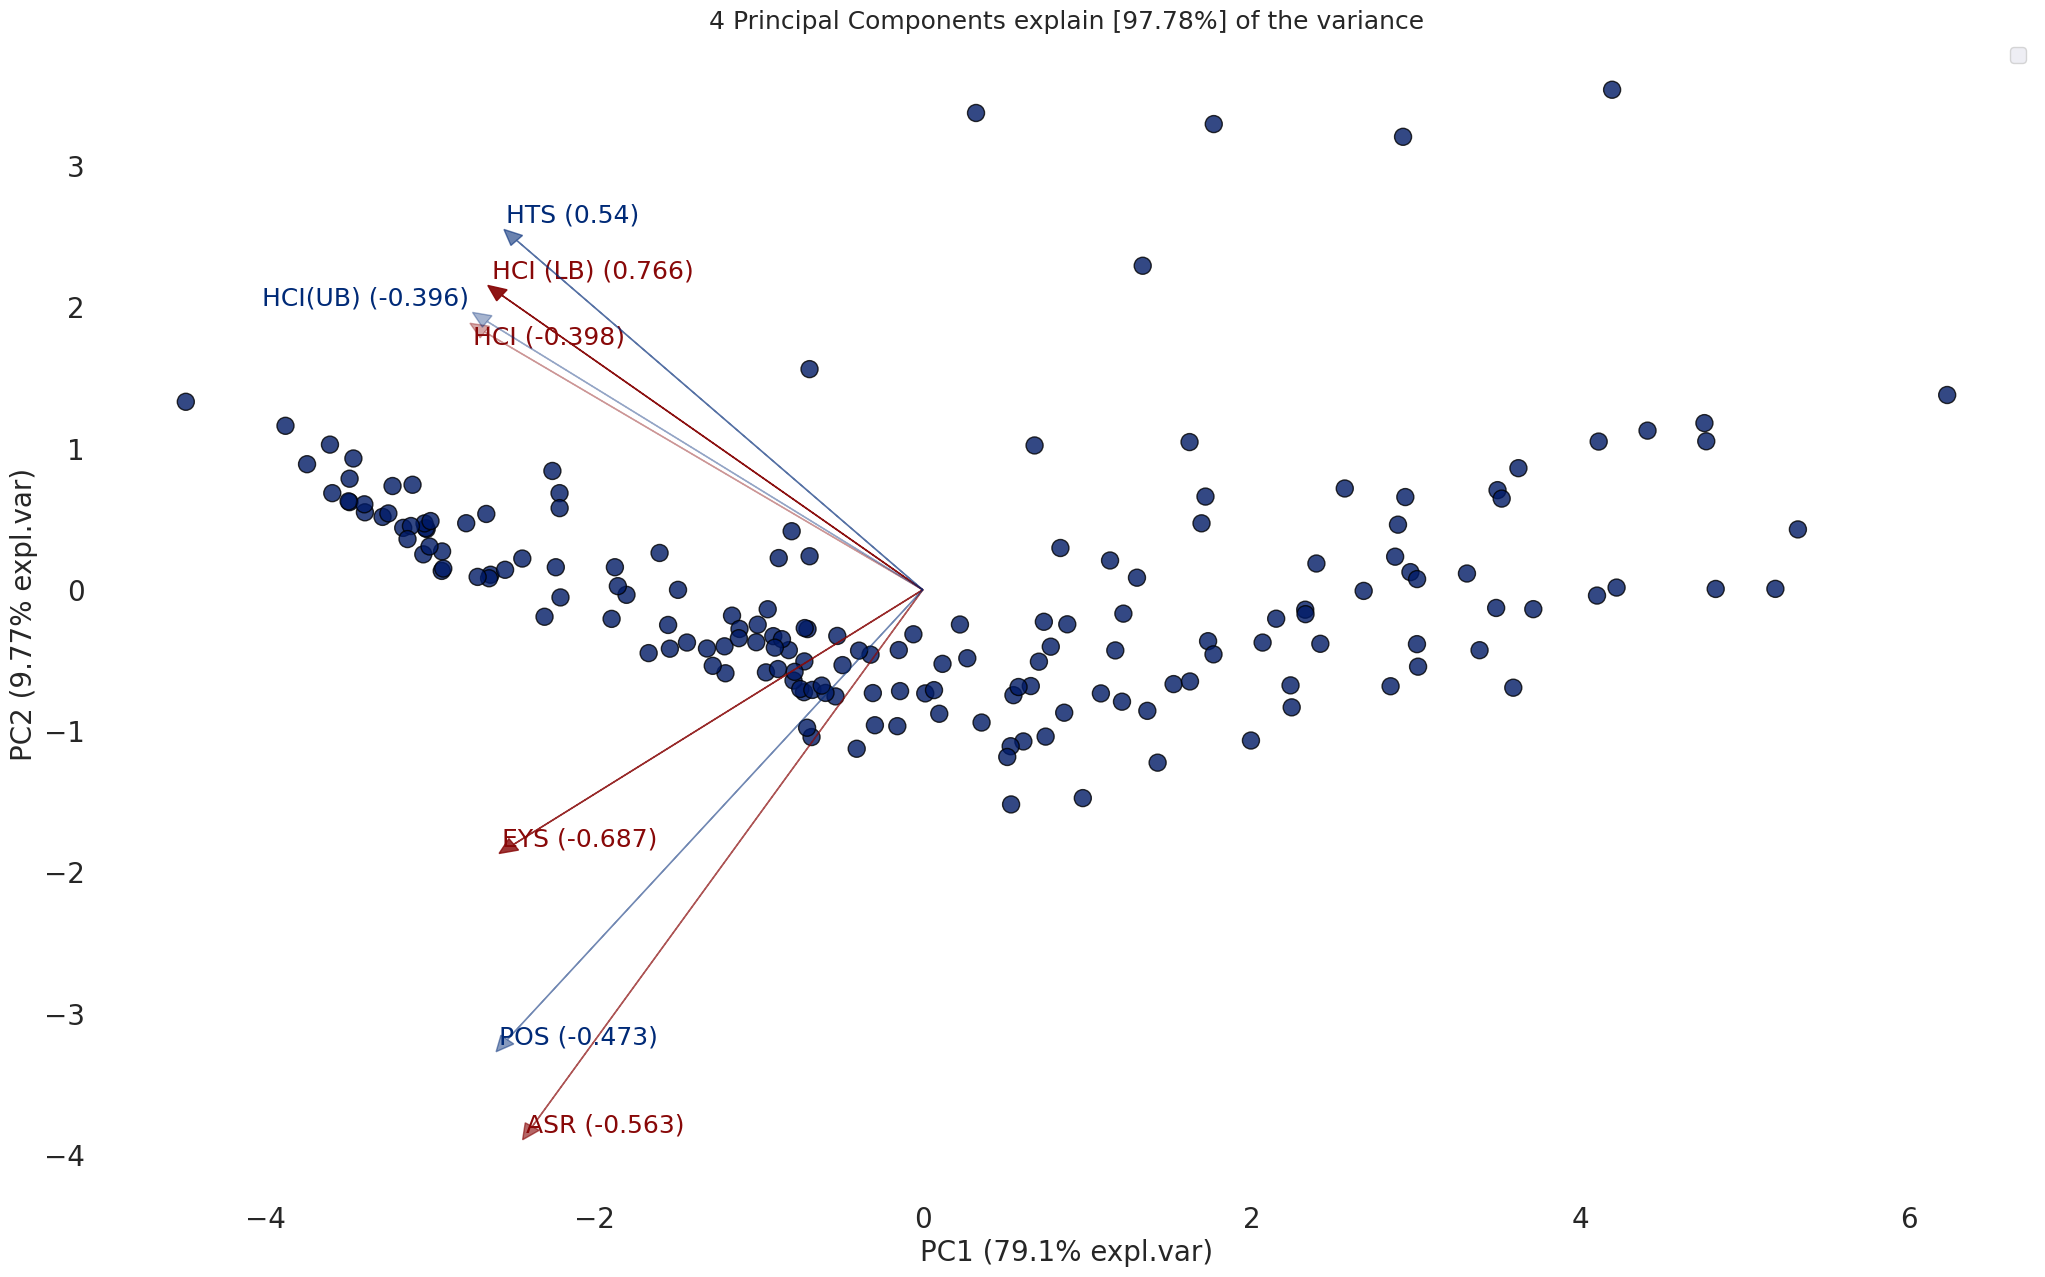

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.78%] of the variance'}, xlabel='PC1 (79.1% expl.var)', ylabel='PC2 (9.77% expl.var)'>)

In [51]:
model.biplot(label=False,legend=True)

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


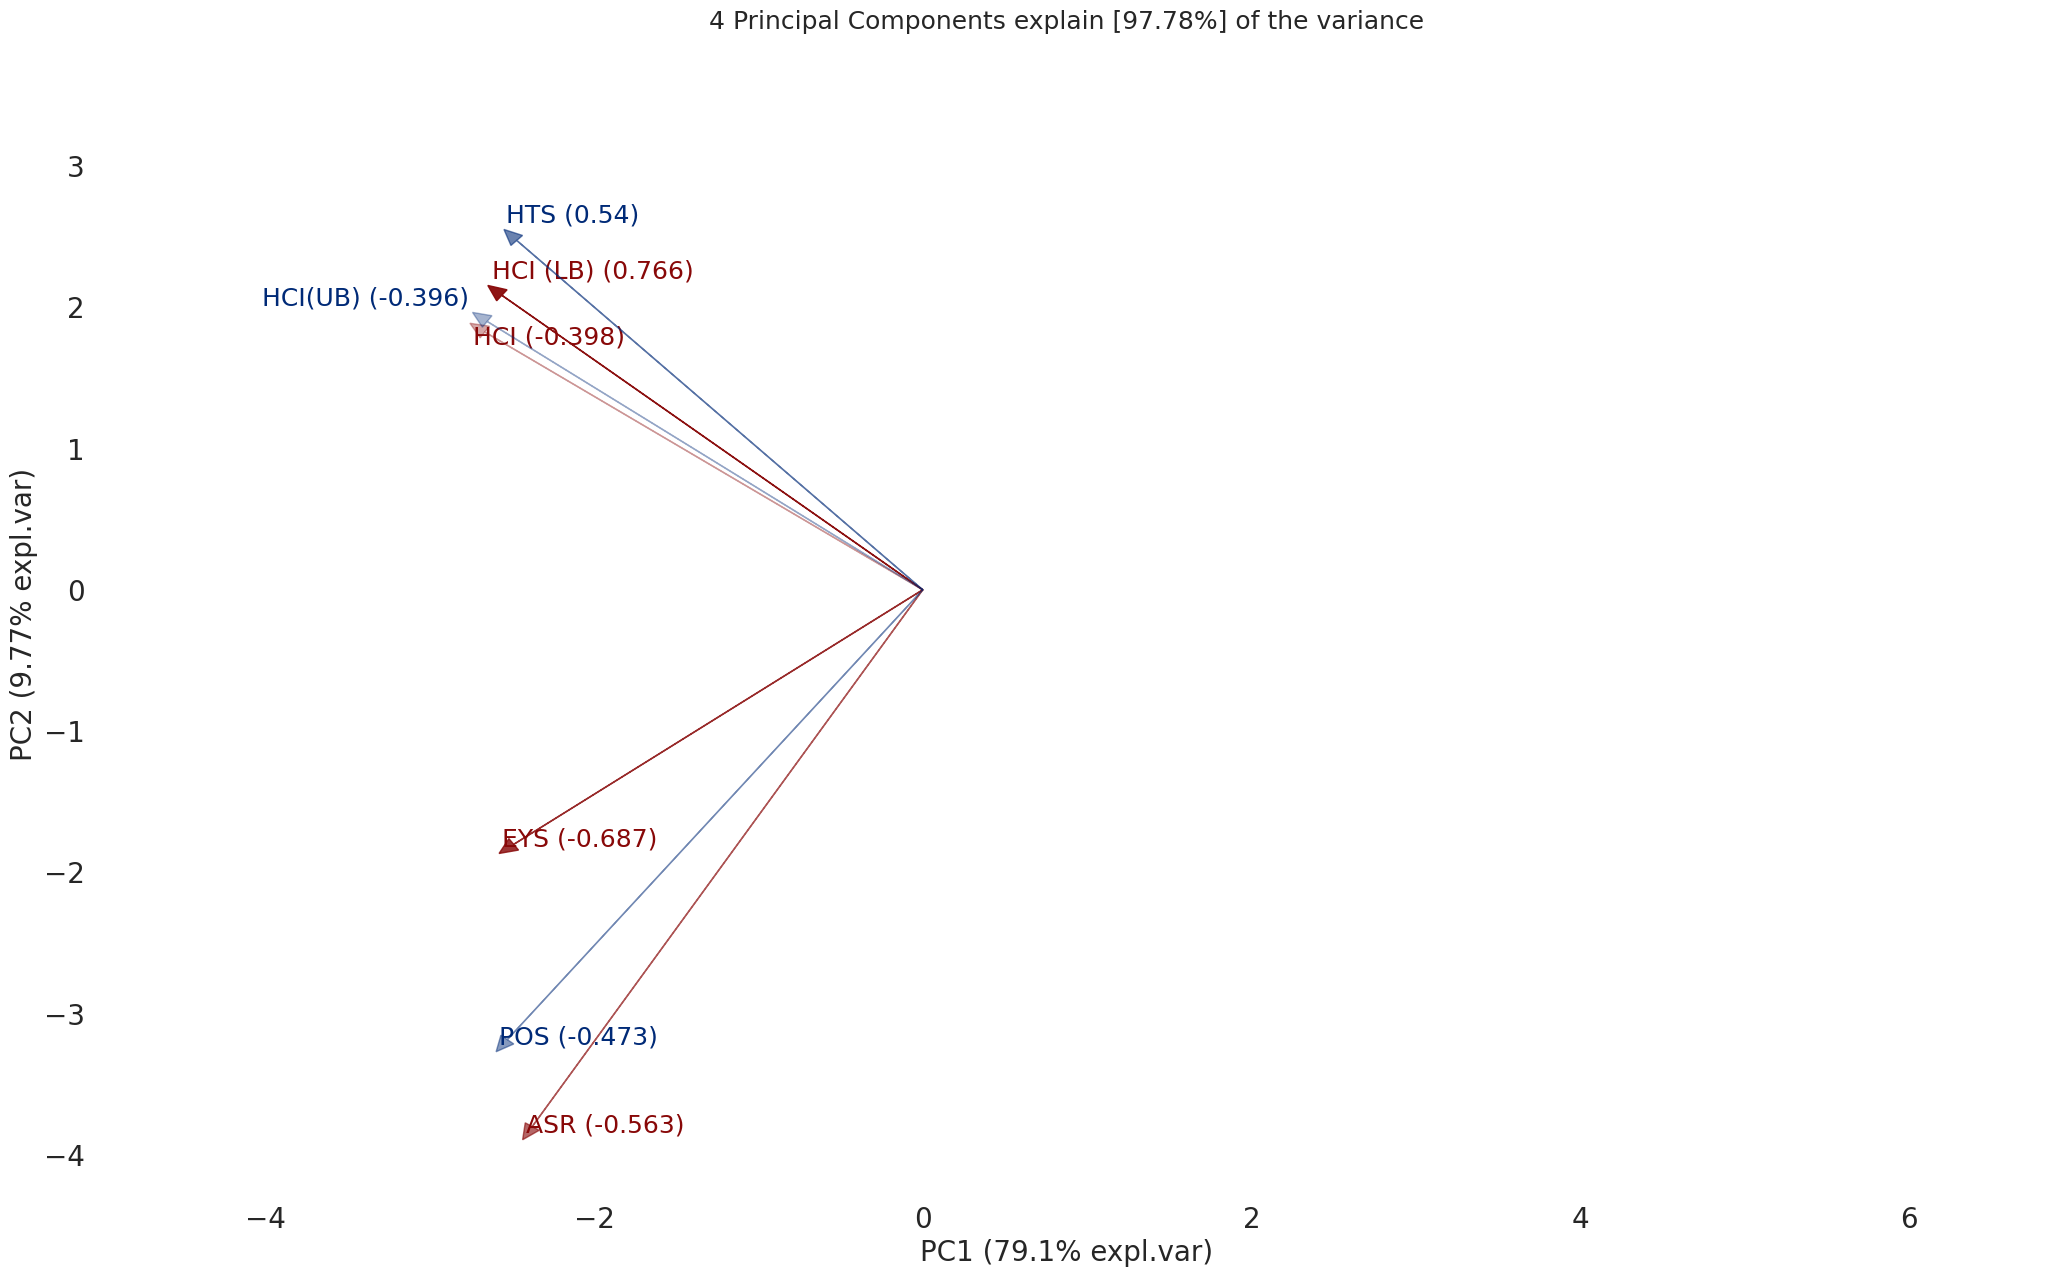

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.78%] of the variance'}, xlabel='PC1 (79.1% expl.var)', ylabel='PC2 (9.77% expl.var)'>)

In [52]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


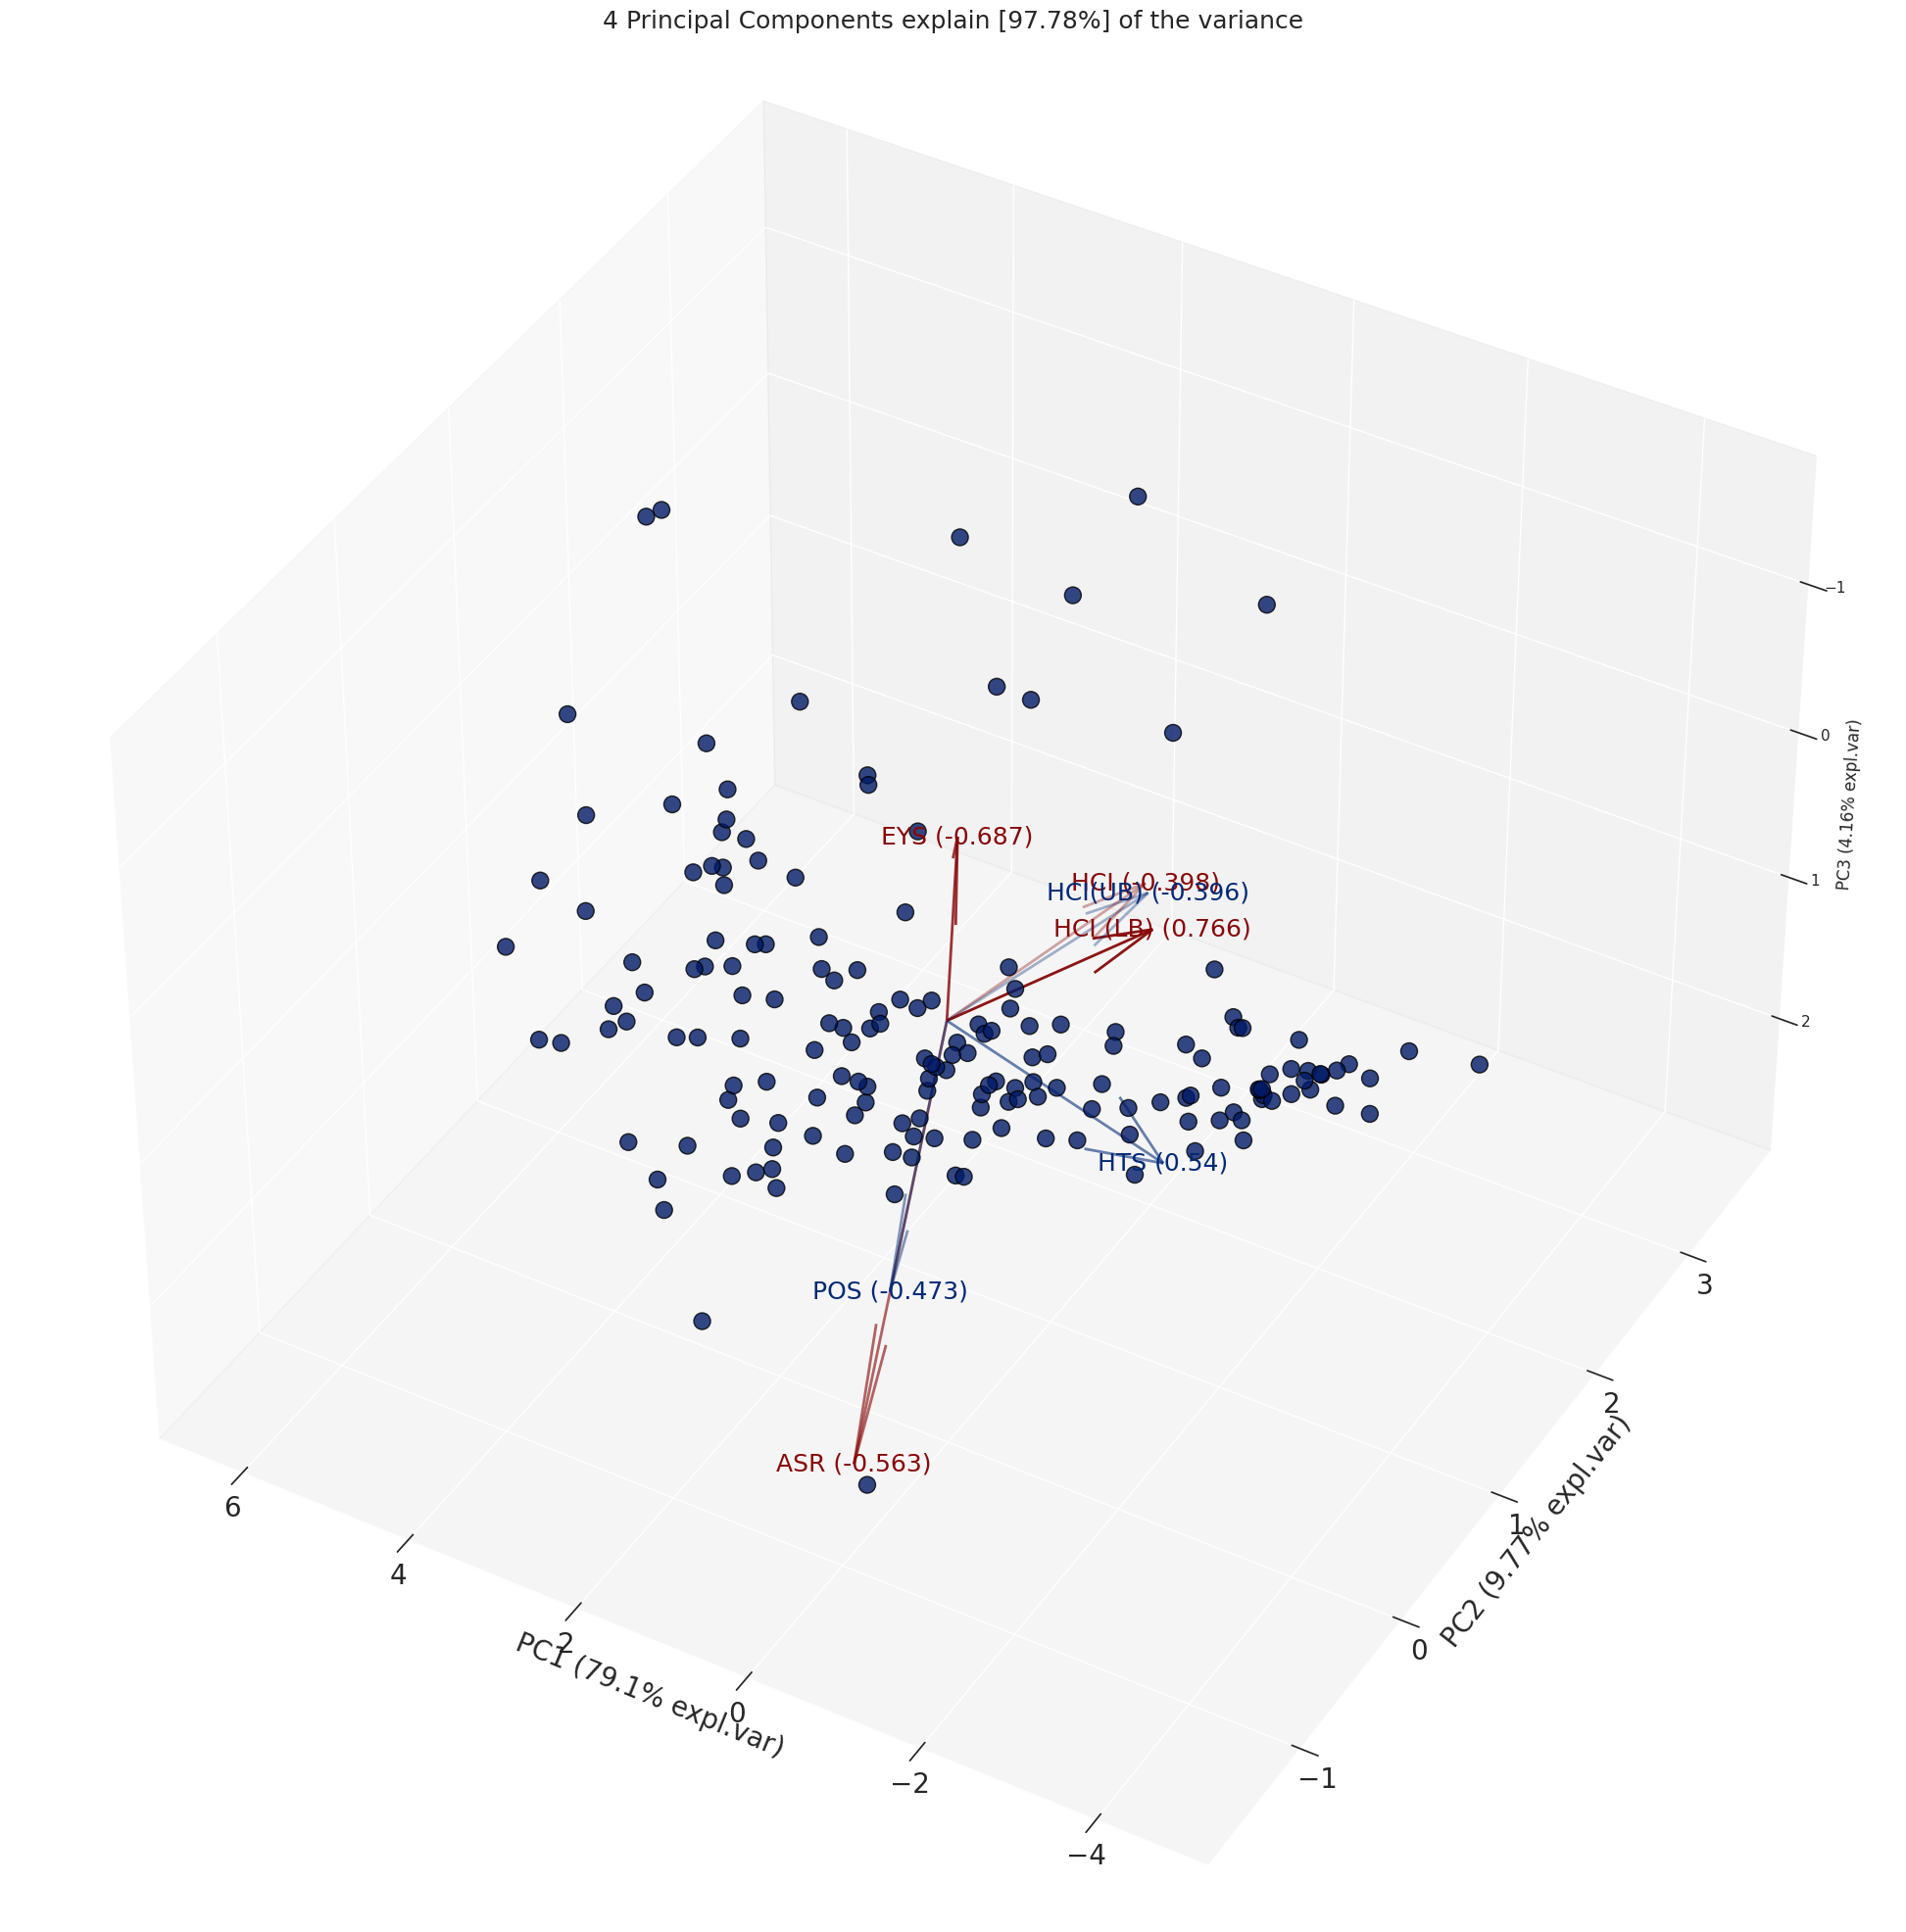

In [53]:
ax = model.biplot3d(legend=False)

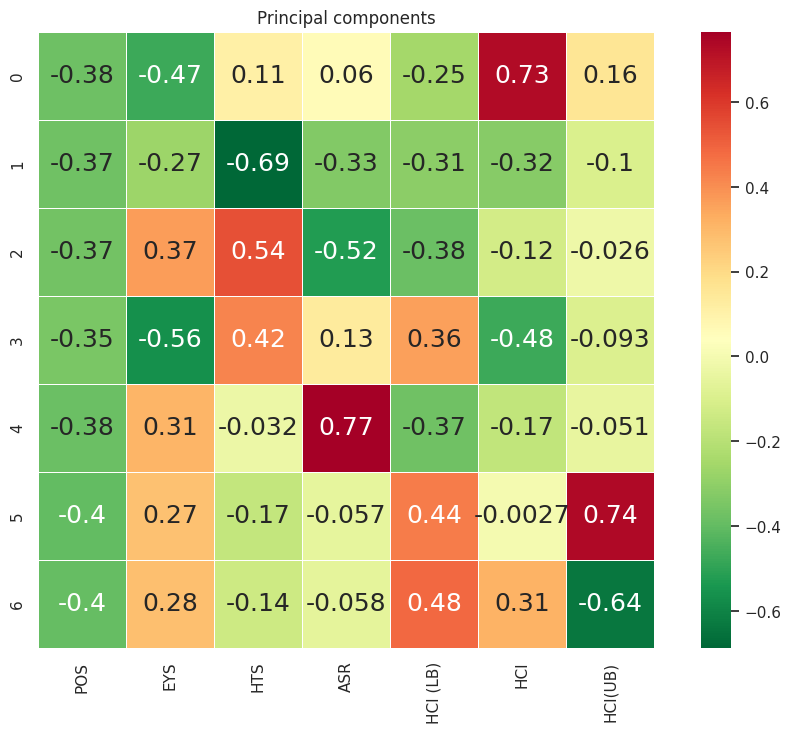

PC1:[-0.37506837 -0.37245494 -0.36815667 -0.35174787 -0.38233213 -0.39810086
 -0.39581939]
PC2:[-0.4725117  -0.26970348  0.36856146 -0.56252046  0.31127163  0.27263943
  0.28373159]


In [54]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

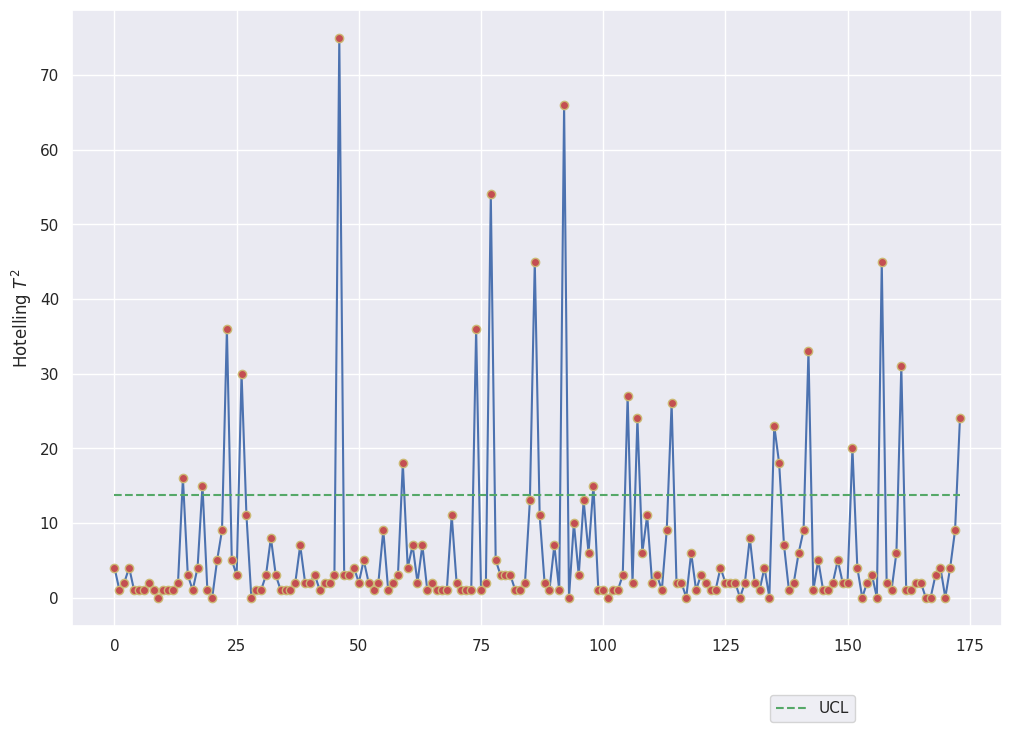

In [55]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [56]:
print(np.argwhere(Tsquare>UCL))

[[ 14]
 [ 18]
 [ 23]
 [ 26]
 [ 46]
 [ 59]
 [ 74]
 [ 77]
 [ 86]
 [ 92]
 [ 98]
 [105]
 [107]
 [114]
 [135]
 [136]
 [142]
 [151]
 [157]
 [161]
 [173]]


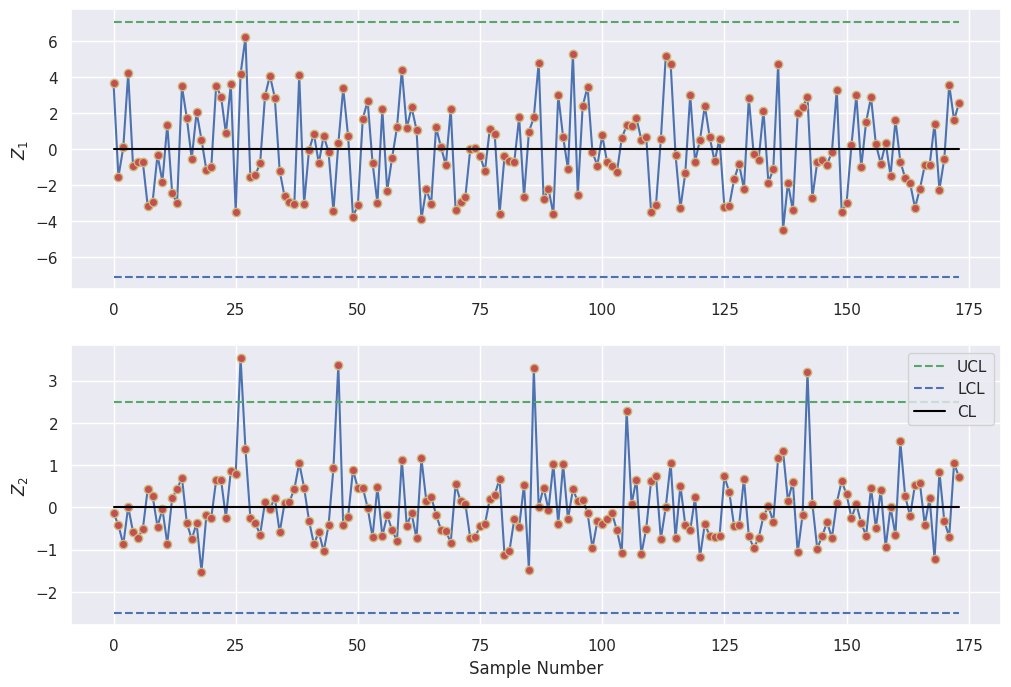

In [57]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [58]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[[ 26]
 [ 46]
 [ 86]
 [142]]


In [59]:
X_train, X_test, y_train, y_test = train_test_split(df, c, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, c, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], c, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 121
Test Dataset Size: 53


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.400     0.400     0.400        10
           2      0.000     0.000     0.000        10
           3      0.455     0.667     0.541        15
           4      0.625     0.556     0.588        18

    accuracy                          0.453        53
   macro avg      0.370     0.406     0.382        53
weighted avg      0.416     0.453     0.428        53



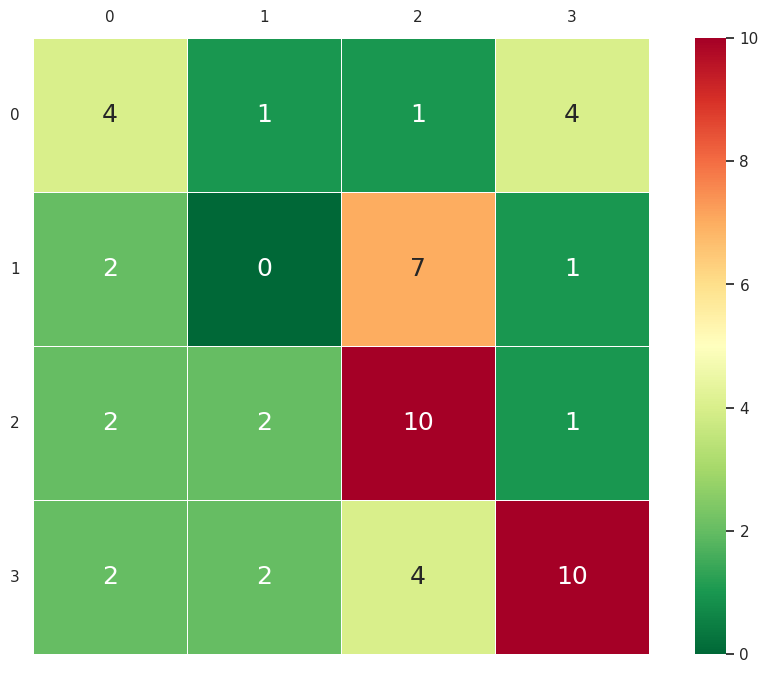

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.200     0.286        10
           2      0.000     0.000     0.000        10
           3      0.400     0.267     0.320        15
           4      0.452     0.778     0.571        18

    accuracy                          0.377        53
   macro avg      0.338     0.311     0.294        53
weighted avg      0.361     0.377     0.339        53



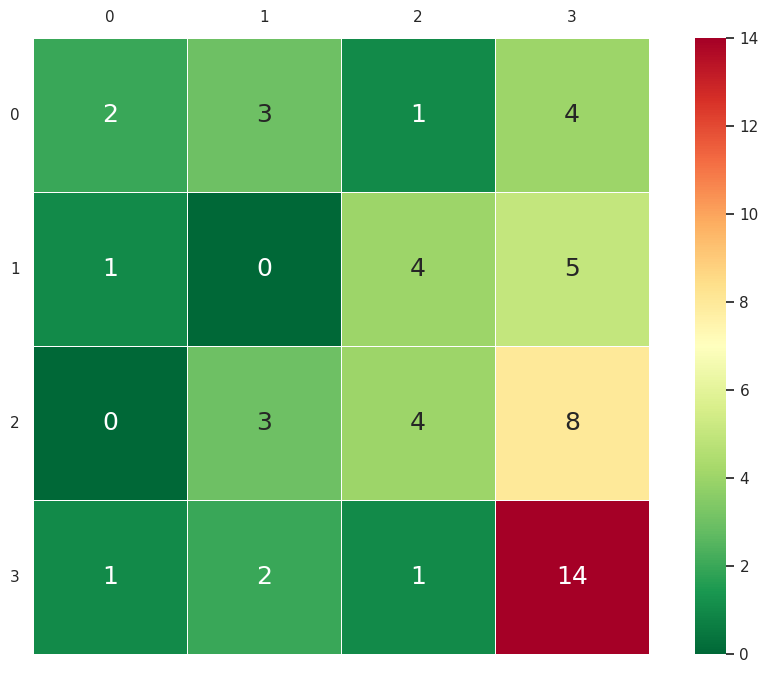

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.667     0.200     0.308        10
           2      0.100     0.100     0.100        10
           3      0.385     0.667     0.488        15
           4      0.643     0.500     0.563        18

    accuracy                          0.415        53
   macro avg      0.449     0.367     0.364        53
weighted avg      0.472     0.415     0.406        53



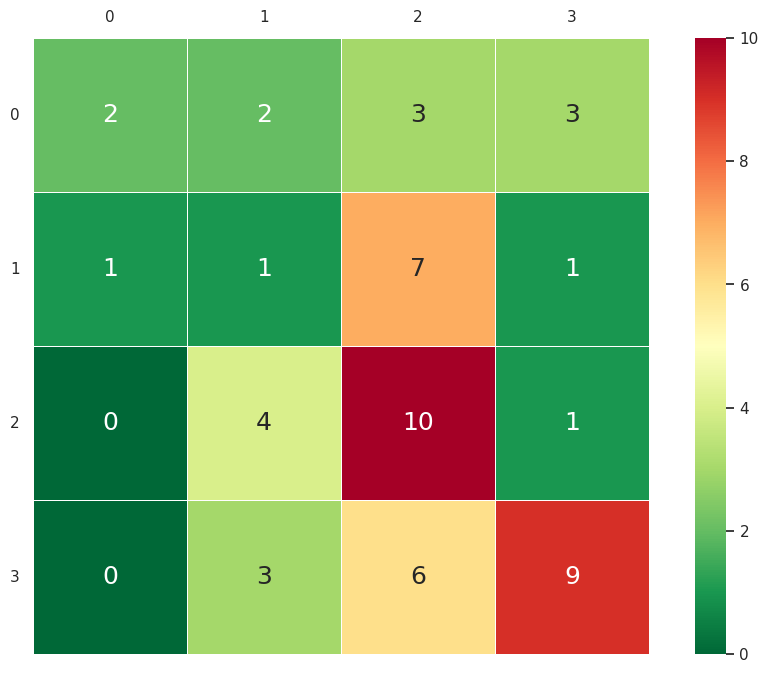

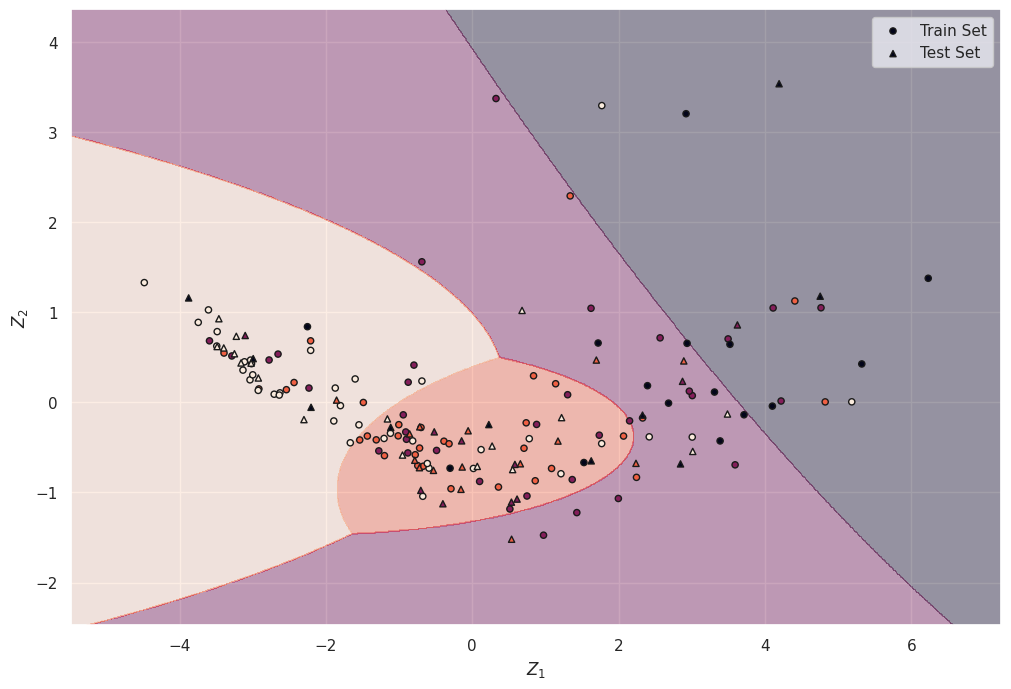

(array([ 0,  2,  3,  7,  8,  9, 11, 13, 15, 17, 18, 19, 20, 22, 23, 27, 28,
       29, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 50, 51]),)


In [60]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 16}
k_Z: {'n_neighbors': 16}
k_Z12: {'n_neighbors': 16}
                                    0         1         2         3         4
knn_full_data fit_time       0.003049  0.003664  0.002926  0.004618  0.003236
knn_Z  fit_time              0.001312  0.001299  0.001267  0.001372  0.001283
knn_Z12 fit_time             0.001324  0.001186  0.001233  0.001162  0.001189
knn_full_data test_f1_macro  0.243223  0.551542  0.561364  0.425718  0.361345
knn_Z  test_f1_macro         0.243223  0.551542  0.561364  0.425718  0.361345
knn_Z12 test_f1_macro        0.204762  0.666667  0.457143  0.535354  0.329762

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.286     0.200     0.235        10
           2      0.222     0.200     0.211        10
           3      0.455     0.667     0.541        15
           4      0.600     0.500     0.545        18

    accuracy                     

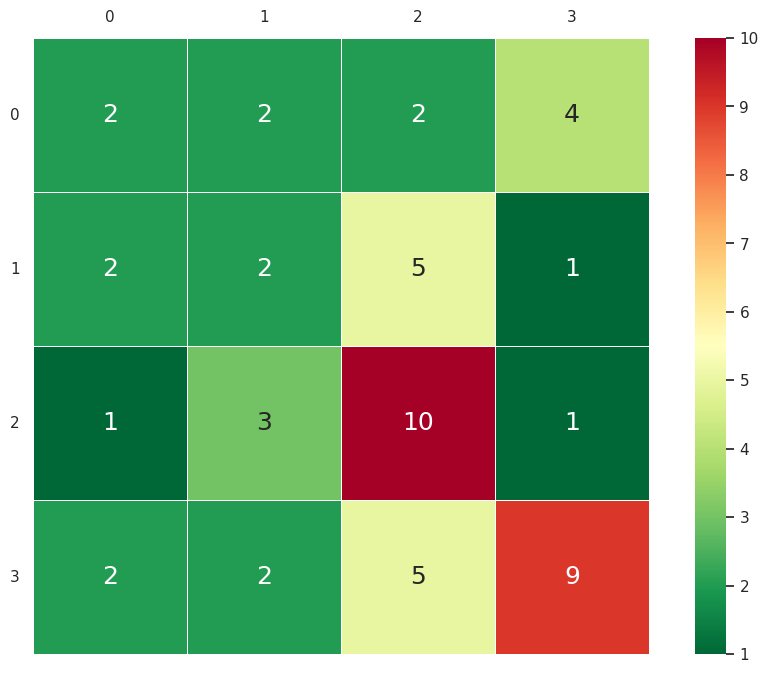

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.286     0.200     0.235        10
           2      0.222     0.200     0.211        10
           3      0.455     0.667     0.541        15
           4      0.600     0.500     0.545        18

    accuracy                          0.434        53
   macro avg      0.391     0.392     0.383        53
weighted avg      0.428     0.434     0.422        53



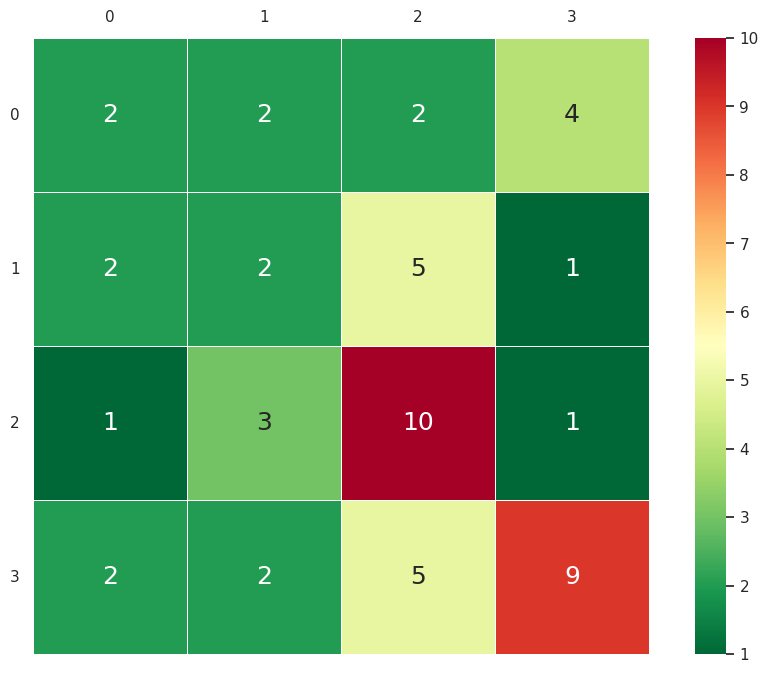

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.375     0.300     0.333        10
           2      0.250     0.300     0.273        10
           3      0.421     0.533     0.471        15
           4      0.643     0.500     0.563        18

    accuracy                          0.434        53
   macro avg      0.422     0.408     0.410        53
weighted avg      0.455     0.434     0.439        53



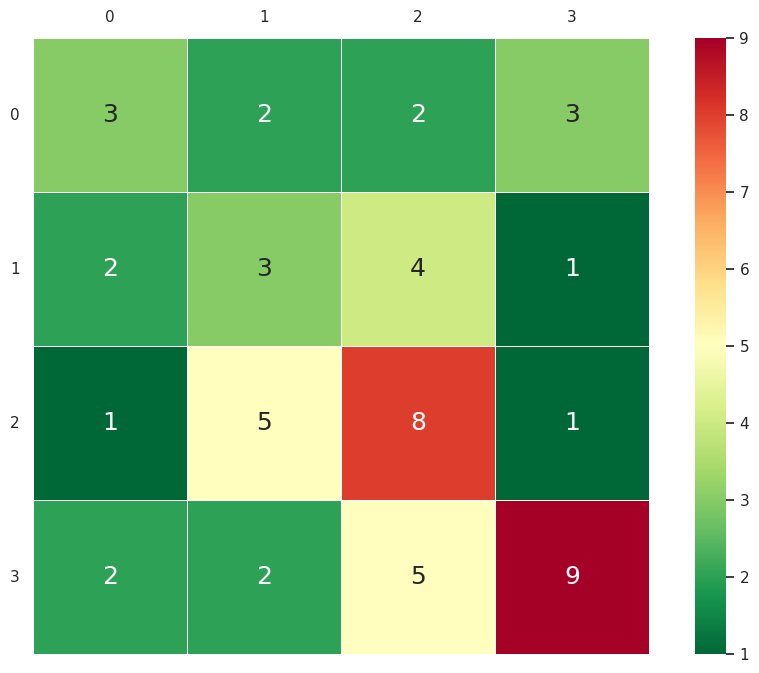

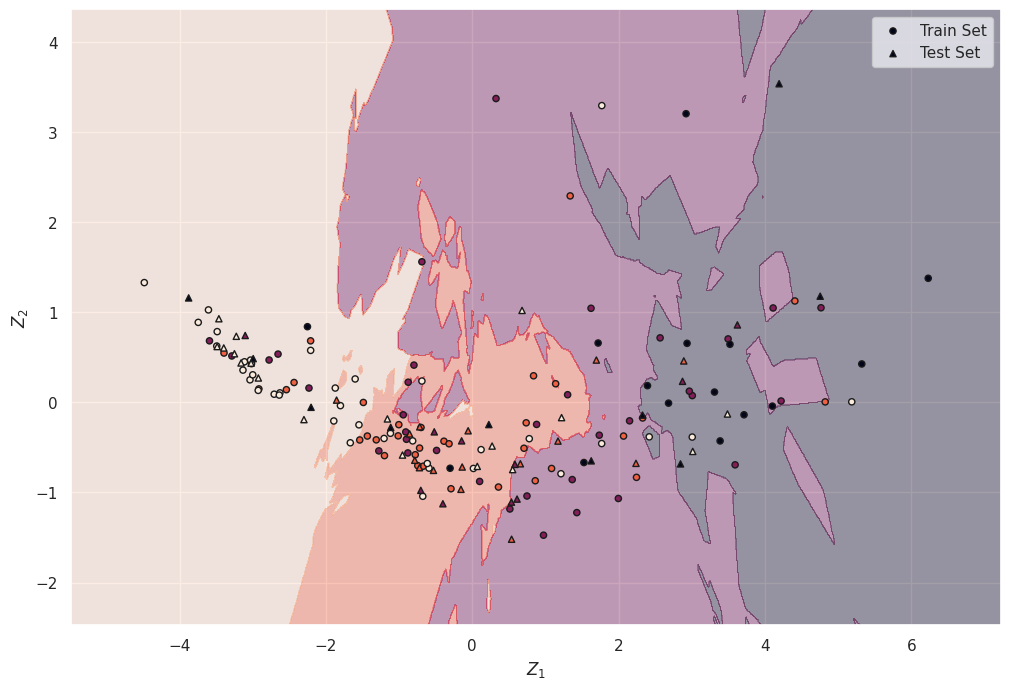

In [61]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.002221  0.002029  0.002459  0.002954  0.002852
dt_Z  fit_time              0.001256  0.001446  0.001149  0.001097  0.001089
dt_Z12 fit_time             0.000909  0.001112  0.000886  0.000843  0.000868
dt_full_data test_f1_macro  0.237395  0.294152  0.371964  0.354167  0.429602
dt_Z  test_f1_macro         0.197917  0.319094  0.419005  0.362338  0.401190
dt_Z12 test_f1_macro        0.298718  0.424825  0.458556  0.368687  0.322055

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     0.200     0.333        10
           2      0.286     0.400     0.333        10
           3      0.412     0.467     0.437        15
           4      0.400     0.444     0.421        18

    accuracy                         

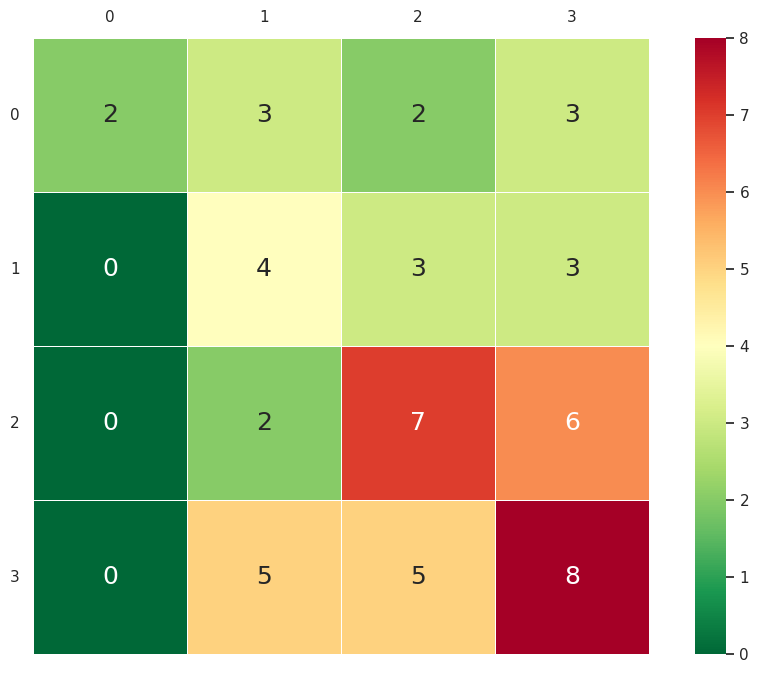

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.300     0.375        10
           2      0.385     0.500     0.435        10
           3      0.455     0.667     0.541        15
           4      0.750     0.500     0.600        18

    accuracy                          0.509        53
   macro avg      0.522     0.492     0.488        53
weighted avg      0.550     0.509     0.510        53



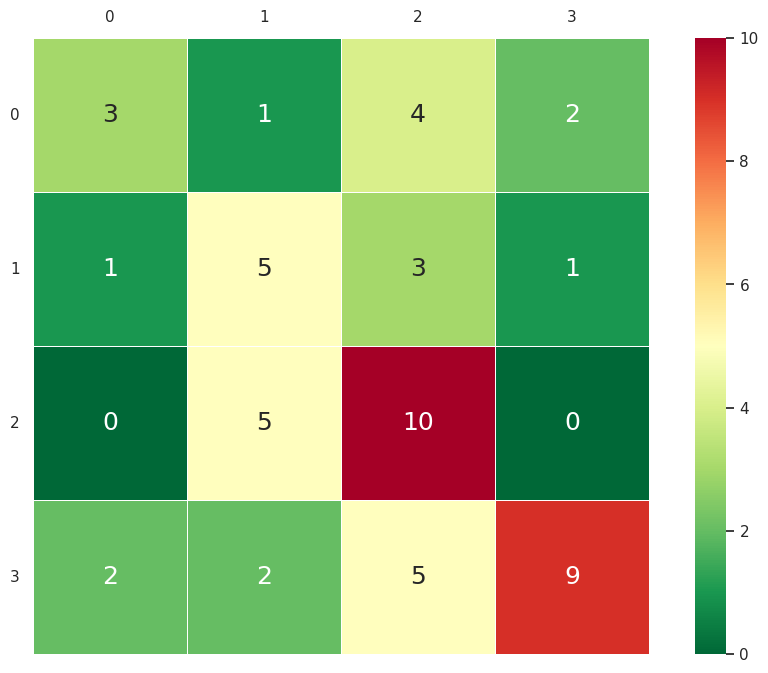

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.200     0.286        10
           2      0.625     0.500     0.556        10
           3      0.429     0.800     0.558        15
           4      0.615     0.444     0.516        18

    accuracy                          0.509        53
   macro avg      0.542     0.486     0.479        53
weighted avg      0.543     0.509     0.492        53



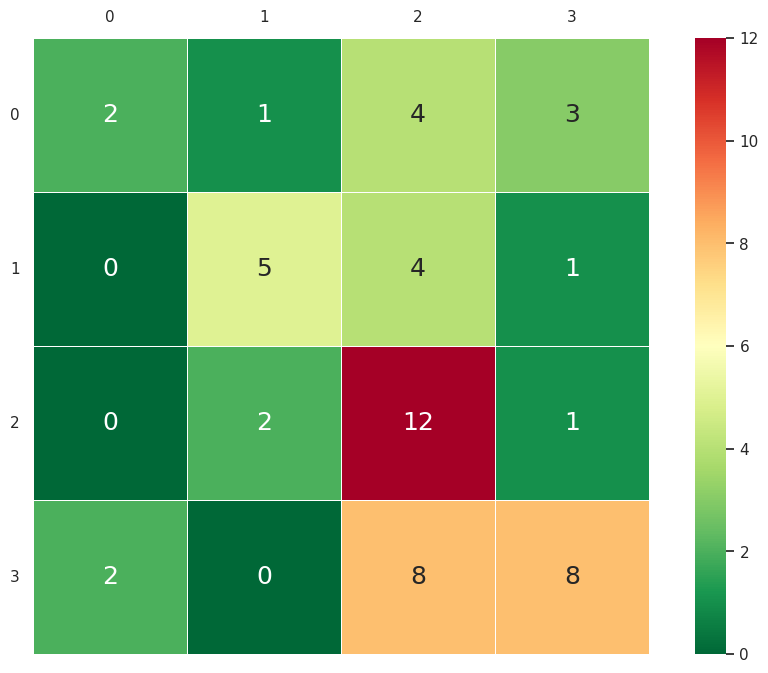

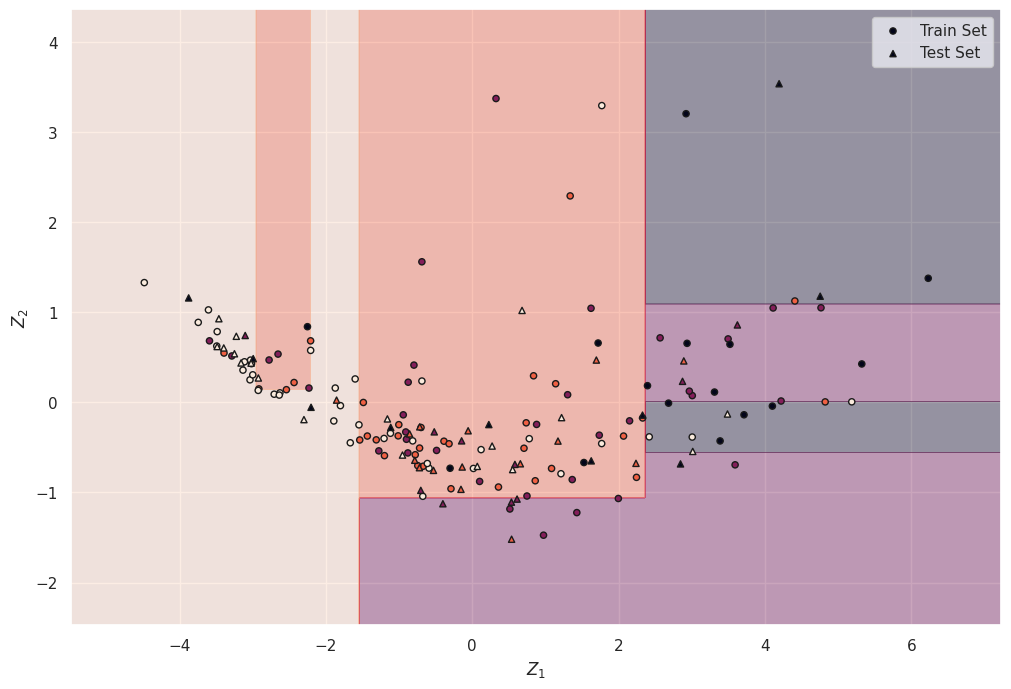

In [62]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


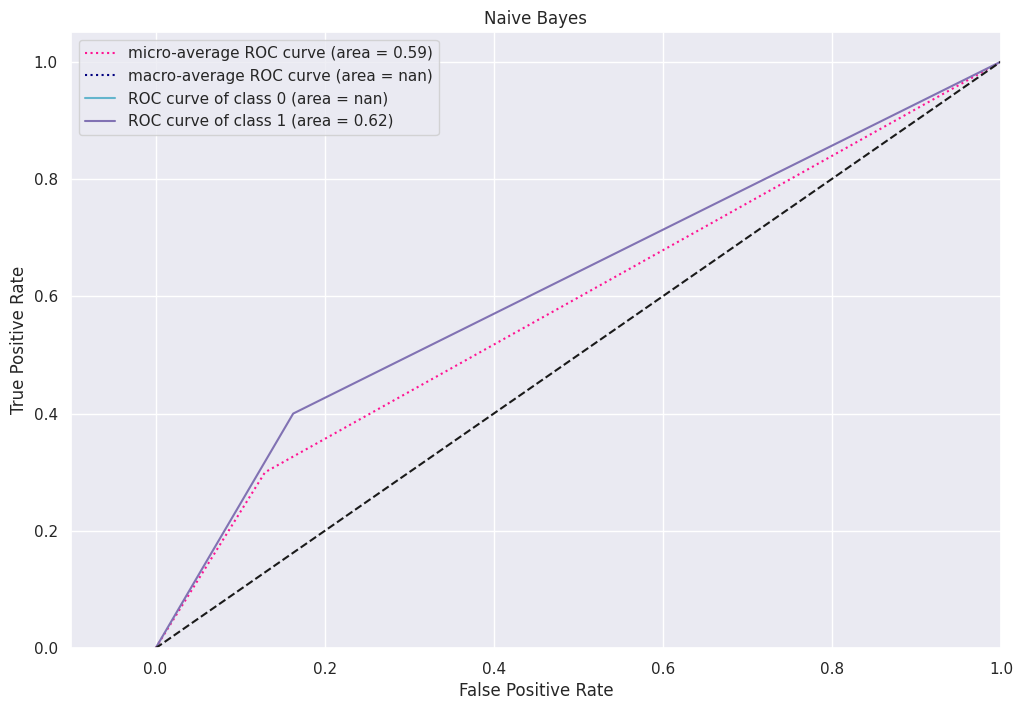

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


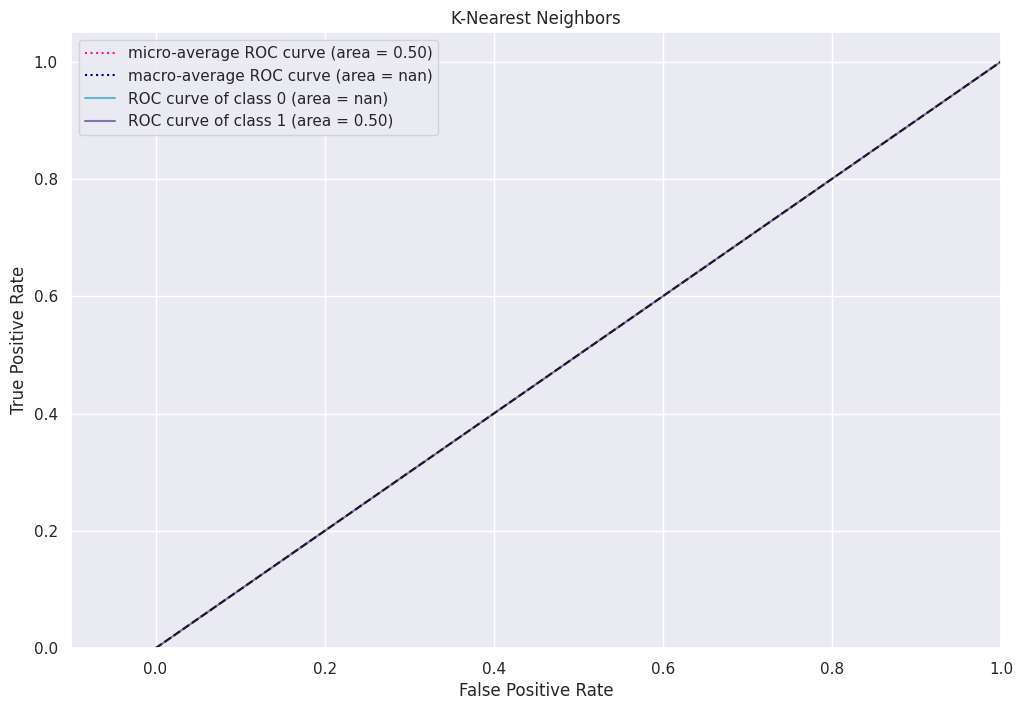

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


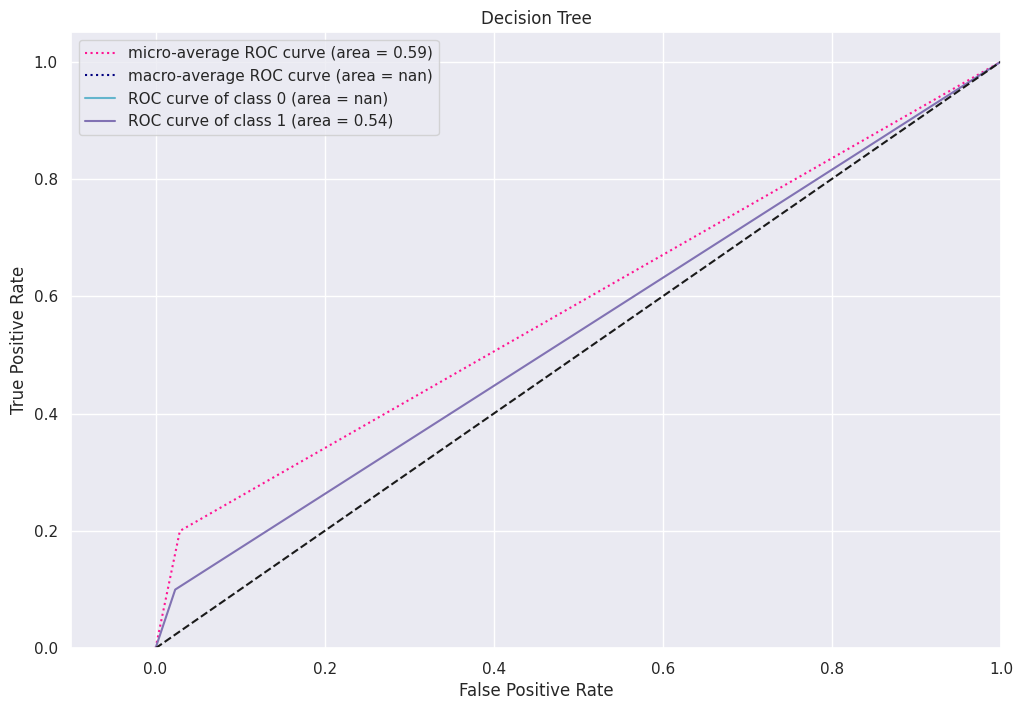

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


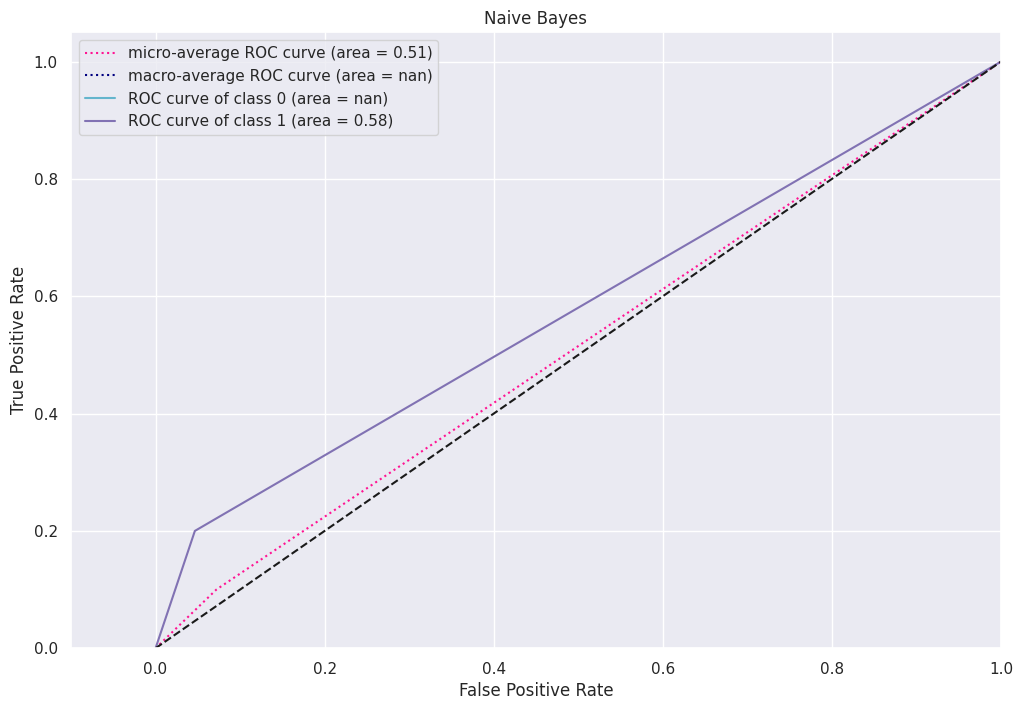

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


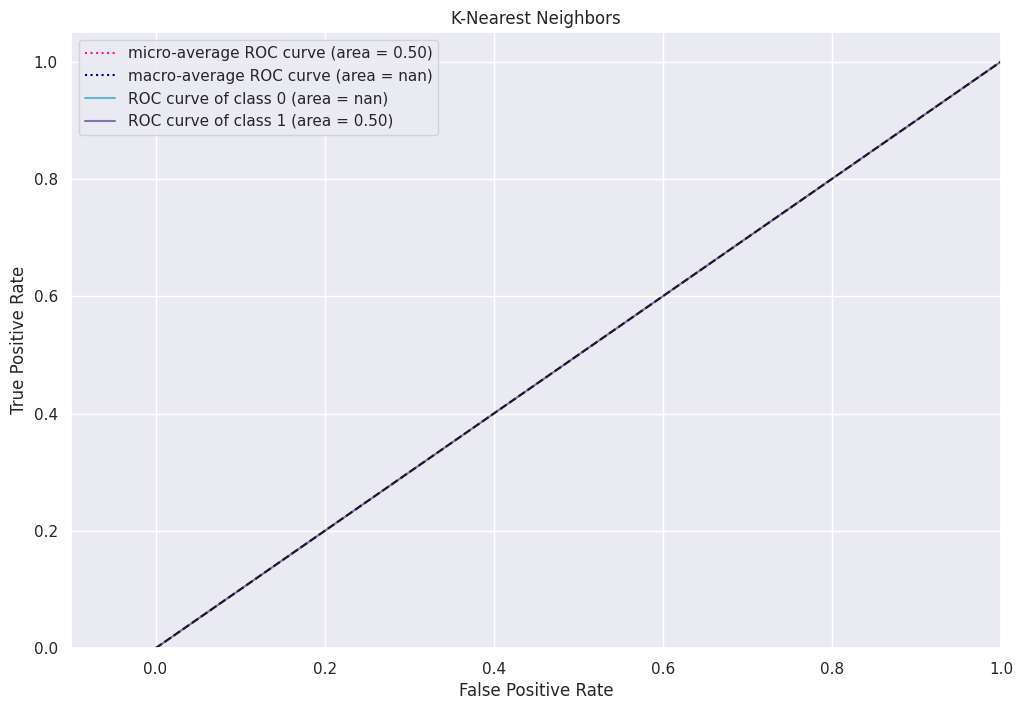

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


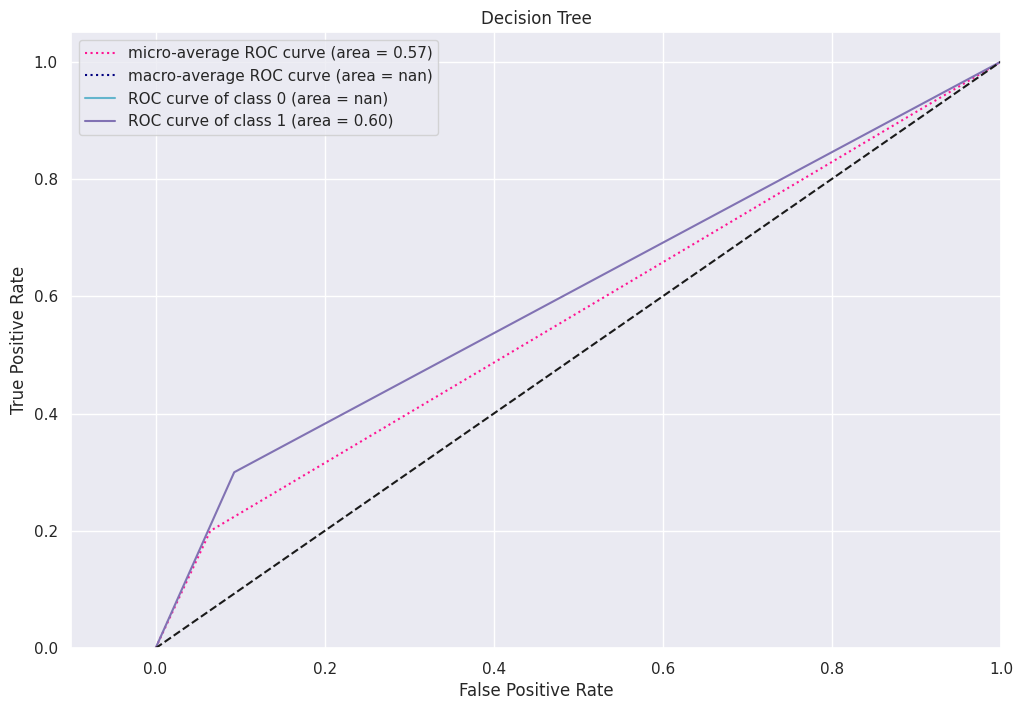

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


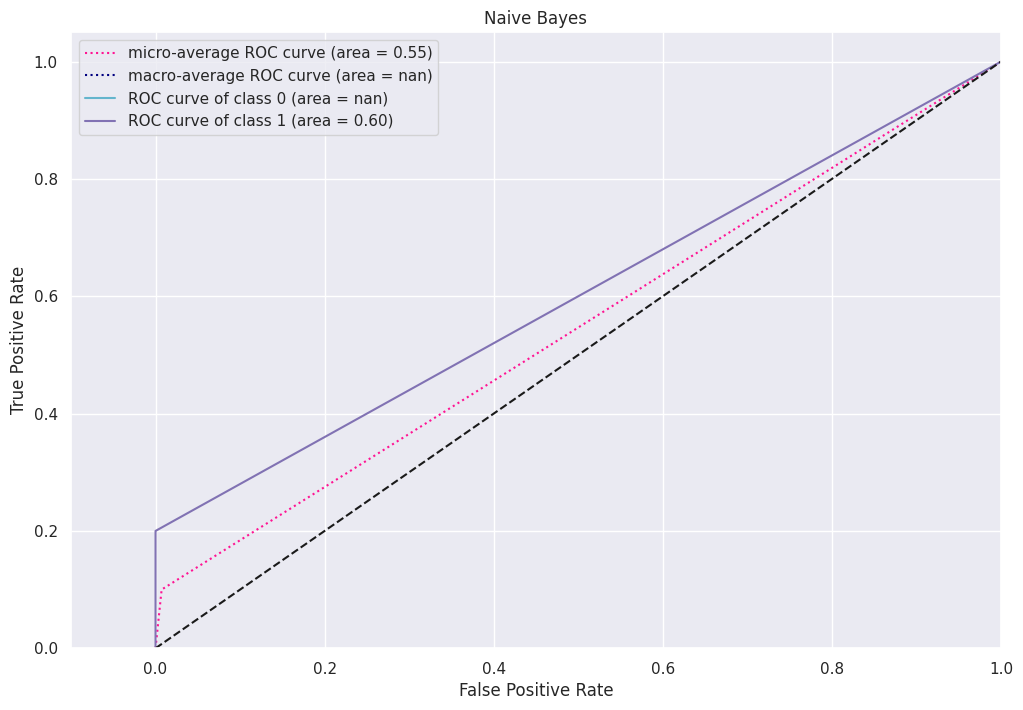

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


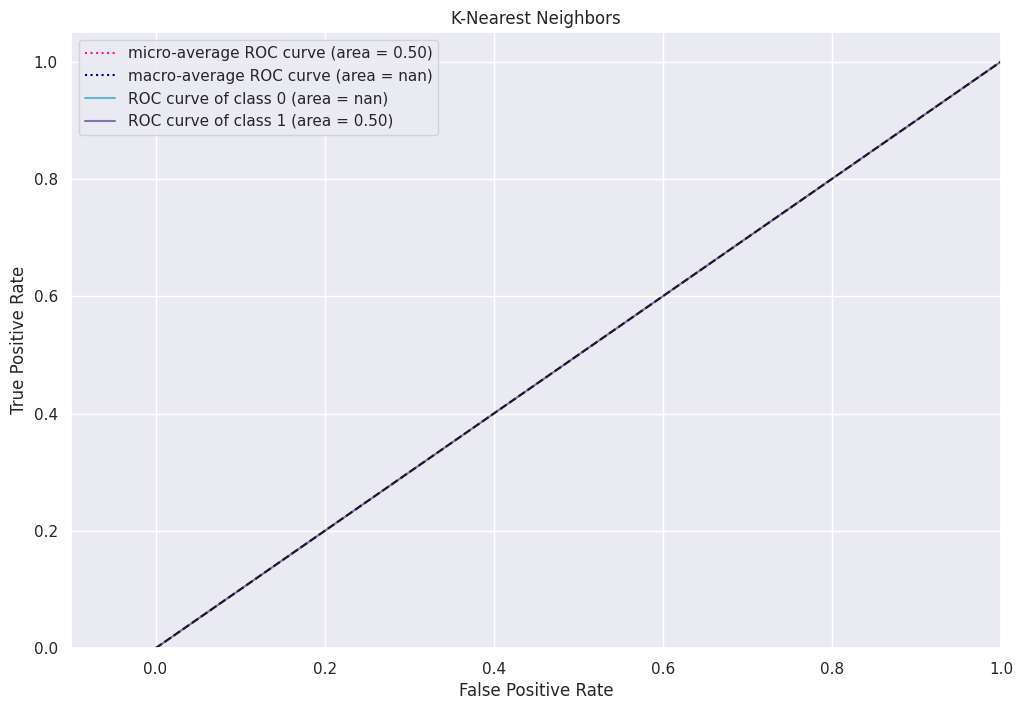

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


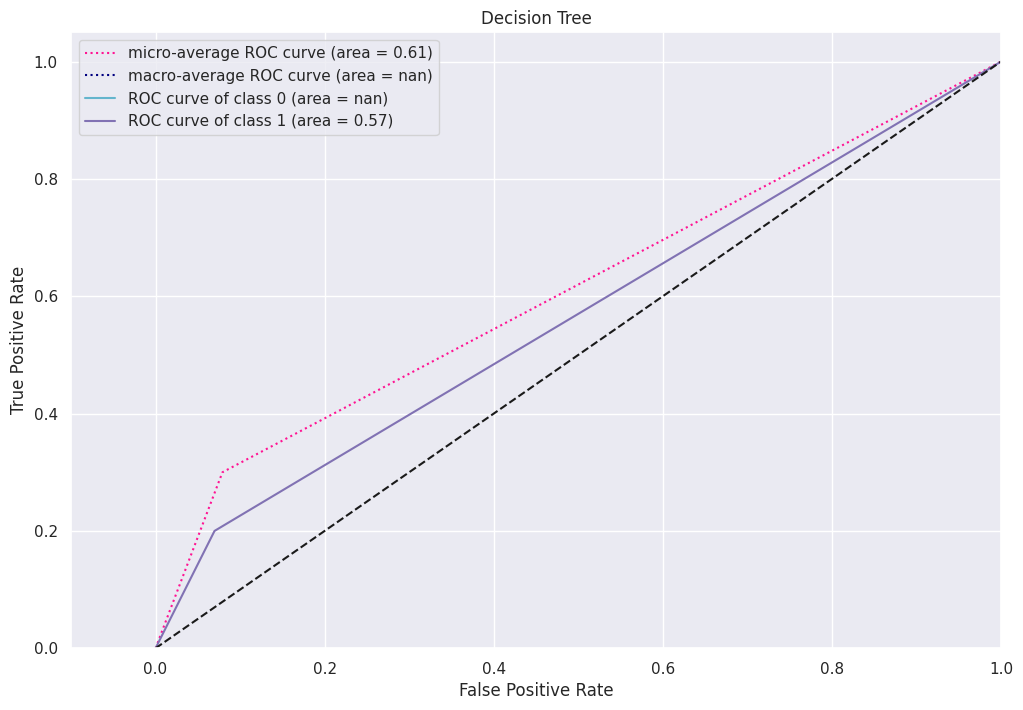

In [63]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes-1), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

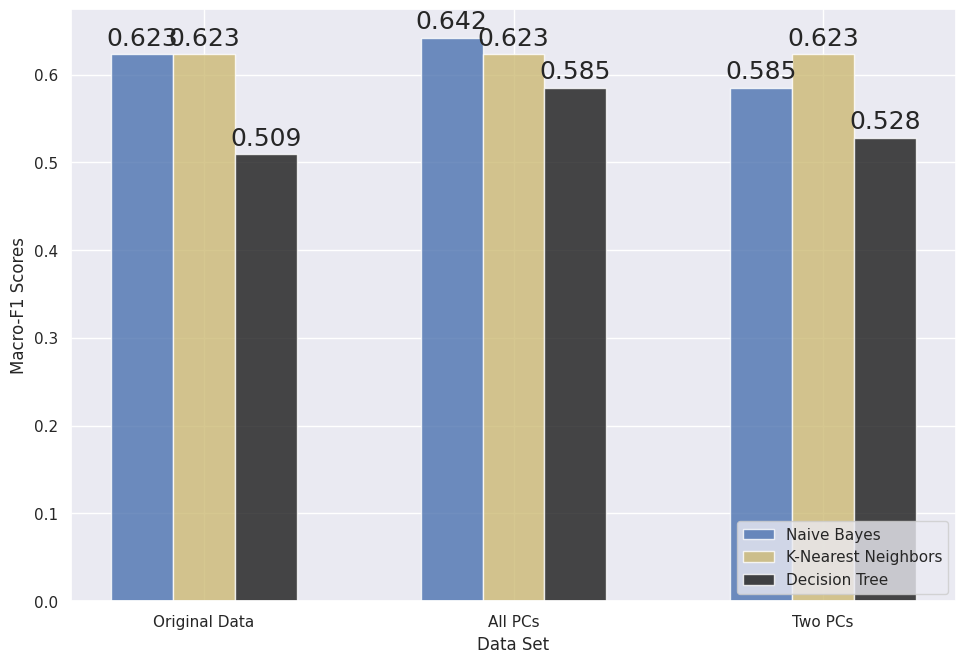

In [64]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.623, 0.642, 0.585)
KNN = (0.623, 0.623, 0.623)
DT = (0.509, 0.585, 0.528)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()